In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from math import sqrt
import math
import matplotlib.pyplot as plt

In [2]:
# import data
df = pd.read_csv("Concrete_Data.csv")

# normalize
for i in ["Cement", "Slag", "Fly_Ash", "Water", "Superplastic", "Coarse_Aggr", "Fine_Aggr", "Age", "CCStr"]:
    df[i]=(df[i]-np.min(df[i]))/(np.max(df[i])-np.min(df[i]))*100

# seperate to X and y
X=df.drop(["CCStr"],axis=1)
y=df["CCStr"]

df

,Cement,Slag,Fly_Ash,Water,Superplastic,Coarse_Aggr,Fine_Aggr,Age,CCStr
0,100.000000,0.000000,0.000000,32.108626,7.763975,69.476744,20.572002,7.417582,96.748474
1,100.000000,0.000000,0.000000,32.108626,7.763975,73.837209,20.572002,7.417582,74.199576
2,52.625571,39.649416,0.000000,84.824281,0.000000,38.081395,0.000000,73.901099,47.265479
3,52.625571,39.649416,0.000000,84.824281,0.000000,38.081395,0.000000,100.000000,48.237199
4,22.054795,36.839176,0.000000,56.070288,0.000000,51.569767,58.078274,98.626374,52.286035
...,...,...,...,...,...,...,...,...,...
1025,39.817352,32.276016,45.127436,46.166134,27.639752,20.087209,43.728048,7.417582,52.261119
1026,50.273973,0.000000,57.771114,59.265176,32.298137,4.912791,55.042649,7.417582,35.941198
1027,10.616438,38.786867,54.272864,56.629393,18.944099,26.569767,46.663322,7.417582,26.622649
1028,13.036530,51.947691,0.000000,42.971246,35.093168,54.825581,48.896136,7.417582,37.922013


In [3]:
# normalize
for i in ["Cement", "Slag", "Fly_Ash", "Water", "Superplastic", "Coarse_Aggr", "Fine_Aggr", "Age", "CCStr"]:
    df[i]=(df[i]-np.min(df[i]))/(np.max(df[i])-np.min(df[i]))
df

,Cement,Slag,Fly_Ash,Water,Superplastic,Coarse_Aggr,Fine_Aggr,Age,CCStr
0,1.000000,0.000000,0.000000,0.321086,0.077640,0.694767,0.205720,0.074176,0.967485
1,1.000000,0.000000,0.000000,0.321086,0.077640,0.738372,0.205720,0.074176,0.741996
2,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,0.739011,0.472655
3,0.526256,0.396494,0.000000,0.848243,0.000000,0.380814,0.000000,1.000000,0.482372
4,0.220548,0.368392,0.000000,0.560703,0.000000,0.515698,0.580783,0.986264,0.522860
...,...,...,...,...,...,...,...,...,...
1025,0.398174,0.322760,0.451274,0.461661,0.276398,0.200872,0.437280,0.074176,0.522611
1026,0.502740,0.000000,0.577711,0.592652,0.322981,0.049128,0.550426,0.074176,0.359412
1027,0.106164,0.387869,0.542729,0.566294,0.189441,0.265698,0.466633,0.074176,0.266226
1028,0.130365,0.519477,0.000000,0.429712,0.350932,0.548256,0.488961,0.074176,0.379220


In [4]:
# import methods
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
enet = ElasticNet()

list1=[]
list2=[]
list3=[]
list4=[]
list5=[]
list6=[]
list7=[]
list8=[]

ratio=np.linspace(0.025,0.5,20)
for test_size in ratio:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Fitting models on Training data 
    lr.fit(X_train, y_train) 
    lasso.fit(X_train, y_train) 
    ridge.fit(X_train, y_train) 
    enet.fit(X_train, y_train) 

    # training and testing with different models and different categorical feature handling methods
    y_pred_lr = lr.predict(X_test) 
    y_pred_lasso = lasso.predict(X_test) 
    y_pred_ridge = ridge.predict(X_test)
    y_pred_enet = enet.predict(X_test)

    list1.append(np.sqrt(mean_squared_error(y_test, y_pred_lr)))
    list2.append(r2_score(y_test, y_pred_lr))
    list3.append(np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
    list4.append(r2_score(y_test, y_pred_lasso))
    list5.append(np.sqrt(mean_squared_error(y_test, y_pred_ridge)))
    list6.append(r2_score(y_test, y_pred_ridge))
    list7.append(np.sqrt(mean_squared_error(y_test, y_pred_enet)))
    list8.append(r2_score(y_test, y_pred_enet))
    
# print("Model\t\t   RMSE \t  R2") 
# print("Linear Regression  {:.4f} \t{:.4f}".format(list1[2], list2[2])) 
# print("Lasso Regression   {:.4f} \t{:.4f}".format(list3[2], list4[2]))
# print("Ridge Regression   {:.4f} \t{:.4f}".format(list5[2], list6[2]))
# print("Enet Regression    {:.4f} \t{:.4f}".format(list7[2], list8[2]))
print("Finish!!")

Finish!!


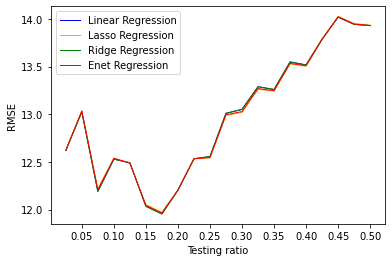

In [5]:
plt.plot(ratio, list1, lw=1, c='blue', label='Linear Regression')  # plot y1
plt.plot(ratio, list3, lw=1, c='orange', label='Lasso Regression')  # plot y2
plt.plot(ratio, list5, lw=1, c='green', label='Ridge Regression')  # plot y3
plt.plot(ratio, list7, lw=1, c='red', label='Enet Regression')  # plot y4

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])  # x軸刻度
plt.xlabel('Testing ratio')  # x軸名字
plt.ylabel('RMSE')  # y軸名字
plt.legend()
plt.show()

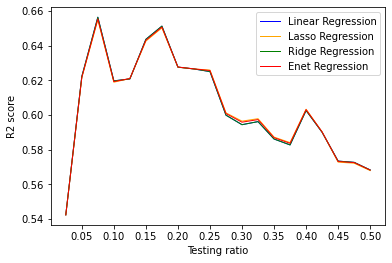

In [6]:
plt.plot(ratio, list2, lw=1, c='blue', ms=4, label='Linear Regression')  # plot y1
plt.plot(ratio, list4, lw=1, c='orange', label='Lasso Regression')  # plot y2
plt.plot(ratio, list6, lw=1, c='green', label='Ridge Regression')  # plot y3
plt.plot(ratio, list8, lw=1, c='red', label='Enet Regression')  # plot y4

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])  # x軸刻度
plt.xlabel('Testing ratio')  # x軸名字
plt.ylabel('R2 score')  # y軸名字
plt.legend()
plt.show()

In [7]:
# import methods
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
enet = ElasticNet()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Fitting models on Training data 
lr.fit(X_train, y_train) 
lasso.fit(X_train, y_train) 
ridge.fit(X_train, y_train) 
enet.fit(X_train, y_train) 

# training and testing with different models and different categorical feature handling methods
y_pred_lr = lr.predict(X_test) 
y_pred_lasso = lasso.predict(X_test) 
y_pred_ridge = ridge.predict(X_test)
y_pred_enet = enet.predict(X_test)
    
print("Model\t\t    RMSE \t  R2") 
print("Linear Regression  {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_lr)), r2_score(y_test, y_pred_lr))) 
print("Lasso Regression   {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_lasso)), r2_score(y_test, y_pred_lasso)))
print("Ridge Regression   {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_ridge)), r2_score(y_test, y_pred_ridge)))
print("Enet Regression    {:.4f}\t{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_enet)), r2_score(y_test, y_pred_enet)))

Model		    RMSE 	  R2
Linear Regression  12.0350	0.6436
Lasso Regression   12.0524	0.6426
Ridge Regression   12.0350	0.6436
Enet Regression    12.0445	0.6430


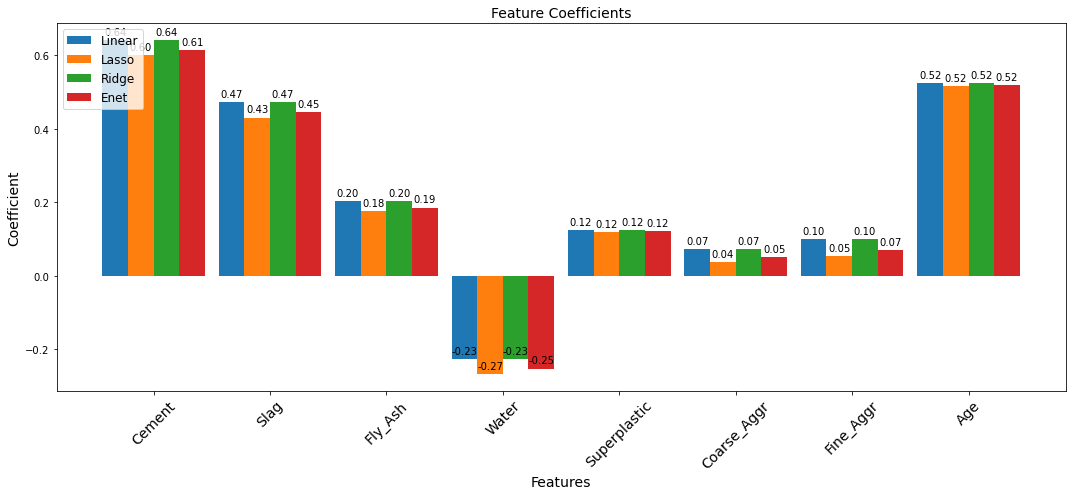

In [8]:
coeff_lr = lr.coef_ 
coeff_lasso = lasso.coef_ 
coeff_ridge = ridge.coef_ 
coeff_enet = enet.coef_

labels = df.columns[:-1] 
x = np.arange(len(labels)) 
width = 0.22
fig, ax = plt.subplots(figsize=(15,7)) 
rects1 = ax.bar(x - 3*(width/2), coeff_lr, width, label='Linear') 
rects2 = ax.bar(x - 1*(width/2), coeff_lasso, width, label='Lasso') 
rects3 = ax.bar(x + 1*(width/2), coeff_ridge, width, label='Ridge') 
rects4 = ax.bar(x + 3*(width/2), coeff_enet, width, label='Enet') 
ax.set_ylabel('Coefficient', fontsize = 14) 
ax.set_xlabel('Features', fontsize = 14) 
ax.set_title('Feature Coefficients', fontsize = 14) 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45, fontsize = 14) 
ax.legend(loc=2, fontsize = 12) 
def autolabel(rects): 
    """Attach a text label above each bar in *rects*, displaying its height.""" 
    for rect in rects: 
        height = rect.get_height() 
        ax.annotate('{:.2f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom') 
autolabel(rects1) 
autolabel(rects2) 
autolabel(rects3)
autolabel(rects4)
fig.tight_layout() 
plt.show()

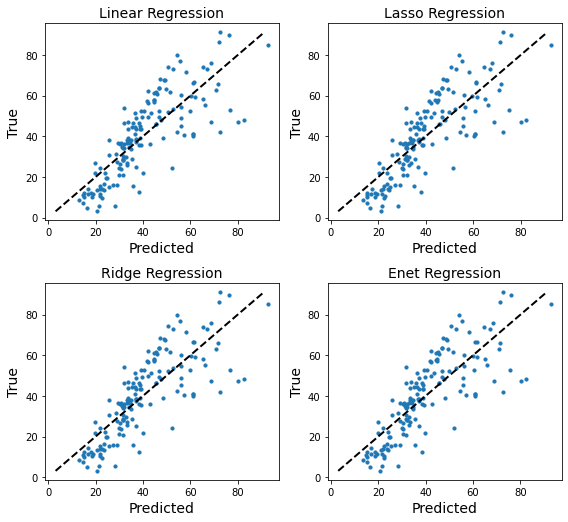

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.scatter(y_pred_lr, y_test, s=10) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True", fontsize = 14) 
ax1.set_xlabel("Predicted", fontsize = 14) 
ax1.set_title("Linear Regression", fontsize = 14) 

ax2.scatter(y_pred_lasso, y_test, s=10) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True", fontsize = 14) 
ax2.set_xlabel("Predicted", fontsize = 14) 
ax2.set_title("Lasso Regression", fontsize = 14) 

ax3.scatter(y_pred_ridge, y_test, s=10) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("True", fontsize = 14) 
ax3.set_xlabel("Predicted", fontsize = 14) 
ax3.set_title("Ridge Regression", fontsize = 14) 

ax4.scatter(y_pred_enet, y_test, s=10) 
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax4.set_ylabel("True", fontsize = 14) 
ax4.set_xlabel("Predicted", fontsize = 14) 
ax4.set_title("Enet Regression", fontsize = 14) 
 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [21]:
# import methods
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()
mlp = MLPRegressor(max_iter=2000)
svm = SVR()

list9=[]
list10=[]
list11=[]
list12=[]
list13=[]
list14=[]
list15=[]
list16=[]

ratio=np.linspace(0.025,0.5,20)
for test_size in ratio:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) 
    
    # Fitting models on Training data
    dtr.fit(X_train, y_train) 
    knn.fit(X_train, y_train) 
    mlp.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    
    # training and testing with different models and different categorical feature handling methods
    y_pred_dtr = dtr.predict(X_test) 
    y_pred_knn = knn.predict(X_test)
    y_pred_mlp = mlp.predict(X_test)
    y_pred_svm = svm.predict(X_test)
    
    list9.append(np.sqrt(mean_squared_error(y_test, y_pred_dtr)))
    list10.append(r2_score(y_test, y_pred_dtr))
    list11.append(np.sqrt(mean_squared_error(y_test, y_pred_knn)))
    list12.append(r2_score(y_test, y_pred_knn))
    list13.append(np.sqrt(mean_squared_error(y_test, y_pred_mlp)))
    list14.append(r2_score(y_test, y_pred_mlp))
    list15.append(np.sqrt(mean_squared_error(y_test, y_pred_svm)))
    list16.append(r2_score(y_test, y_pred_svm))
    
print("Finish!!")

Finish!!


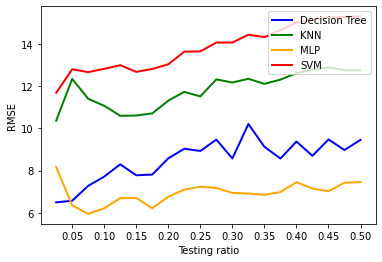

In [22]:
plt.plot(ratio, list9,  lw=2, c='blue', label='Decision Tree')
plt.plot(ratio, list11, lw=2, c='green', label='KNN')
plt.plot(ratio, list13, lw=2, c='orange', label='MLP')
plt.plot(ratio, list15, lw=2, c='red', label='SVM')

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Testing ratio')
plt.ylabel('RMSE')
plt.legend(loc=1)
plt.show()

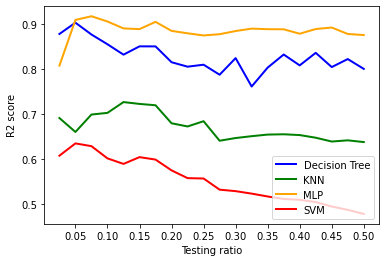

In [23]:
plt.plot(ratio, list10,  lw=2, c='blue', label='Decision Tree')
plt.plot(ratio, list12, lw=2, c='green', label='KNN')
plt.plot(ratio, list14, lw=2, c='orange', label='MLP')
plt.plot(ratio, list16, lw=2, c='red', label='SVM')

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Testing ratio')
plt.ylabel('R2 score')
plt.legend(loc=4)
plt.show()

In [13]:
# import methods
dtr = DecisionTreeRegressor()
knn = KNeighborsRegressor()
mlp = MLPRegressor(max_iter=1000)
svm = SVR()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Fitting models on Training data
dtr.fit(X_train, y_train) 
knn.fit(X_train, y_train) 
mlp.fit(X_train, y_train)
svm.fit(X_train, y_train)
    
# training and testing with different models and different categorical feature handling methods
y_pred_dtr = dtr.predict(X_test) 
y_pred_knn = knn.predict(X_test)
y_pred_mlp = mlp.predict(X_test)
y_pred_svm = svm.predict(X_test)
    
print("Model\t\t RMSE \t   R2") 
print("Decision Tree   {:.4f}\t {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_dtr)), r2_score(y_test, y_pred_dtr))) 
print("KNN Regression  {:.4f}\t {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_knn)), r2_score(y_test, y_pred_knn)))
print("MLP Regression  {:.4f}\t {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_mlp)), r2_score(y_test, y_pred_mlp)))
print("SVM Regression  {:.4f}\t {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_svm)), r2_score(y_test, y_pred_svm)))

Model		 RMSE 	   R2
Decision Tree   7.7407	 0.8526
KNN Regression  10.6142	 0.7228
MLP Regression  6.3915	 0.8995
SVM Regression  12.6831	 0.6042


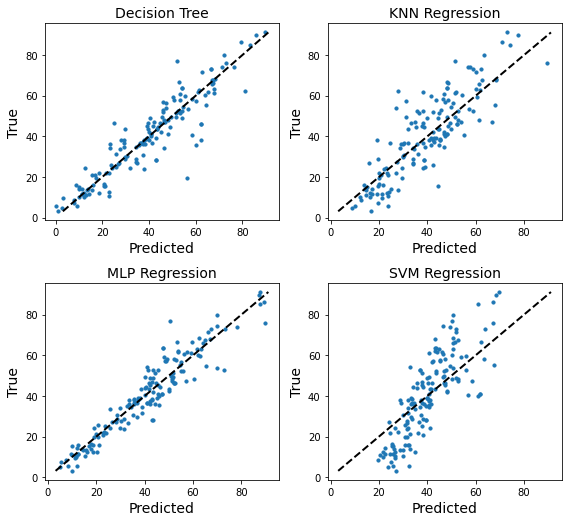

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.scatter(y_pred_dtr, y_test, s=10) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True", fontsize = 14) 
ax1.set_xlabel("Predicted", fontsize = 14) 
ax1.set_title("Decision Tree", fontsize = 14) 

ax2.scatter(y_pred_knn, y_test, s=10) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax2.set_ylabel("True", fontsize = 14) 
ax2.set_xlabel("Predicted", fontsize = 14) 
ax2.set_title("KNN Regression", fontsize = 14) 

ax3.scatter(y_pred_mlp, y_test, s=10) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True", fontsize = 14) 
ax3.set_xlabel("Predicted", fontsize = 14) 
ax3.set_title("MLP Regression", fontsize = 14) 

ax4.scatter(y_pred_svm, y_test, s=10) 
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax4.set_ylabel("True", fontsize = 14) 
ax4.set_xlabel("Predicted", fontsize = 14) 
ax4.set_title("SVM Regression", fontsize = 14) 
 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [15]:
# import methods
lgbm = LGBMRegressor()
xgb = XGBRegressor()
cat = CatBoostRegressor()
rdf = RandomForestRegressor()

list17=[]
list18=[]
list19=[]
list20=[]
list21=[]
list22=[]
list23=[]
list24=[]

ratio=np.linspace(0.025,0.5,20)
for test_size in ratio:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42) 
    
    # Fitting models on Training data
    lgbm.fit(X_train, y_train) 
    xgb.fit(X_train, y_train) 
    cat.fit(X_train, y_train) 
    rdf.fit(X_train, y_train)
    
    # training and testing with different models and different categorical feature handling methods
    y_pred_lgbm=lgbm.predict(X_test)
    y_pred_xgb = xgb.predict(X_test)
    y_pred_cat = cat.predict(X_test)
    y_pred_rdf = rdf.predict(X_test)
    
    list17.append(np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))
    list18.append(r2_score(y_test, y_pred_lgbm))
    list19.append(np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
    list20.append(r2_score(y_test, y_pred_xgb))
    list21.append(np.sqrt(mean_squared_error(y_test, y_pred_cat)))
    list22.append(r2_score(y_test, y_pred_cat))
    list23.append(np.sqrt(mean_squared_error(y_test, y_pred_rdf)))
    list24.append(r2_score(y_test, y_pred_rdf))

print("Finish!!")    

Learning rate set to 0.040969
0:	learn: 20.3111345	total: 147ms	remaining: 2m 27s
1:	learn: 19.8018809	total: 149ms	remaining: 1m 14s
2:	learn: 19.3828203	total: 150ms	remaining: 49.8s
3:	learn: 18.8908752	total: 151ms	remaining: 37.7s
4:	learn: 18.4634870	total: 153ms	remaining: 30.5s
5:	learn: 18.0146784	total: 155ms	remaining: 25.7s
6:	learn: 17.6320950	total: 156ms	remaining: 22.2s
7:	learn: 17.2501856	total: 157ms	remaining: 19.5s
8:	learn: 16.8533427	total: 159ms	remaining: 17.5s
9:	learn: 16.4648006	total: 160ms	remaining: 15.8s
10:	learn: 16.0900538	total: 161ms	remaining: 14.5s
11:	learn: 15.7441722	total: 163ms	remaining: 13.4s
12:	learn: 15.3911376	total: 164ms	remaining: 12.5s
13:	learn: 15.0669563	total: 166ms	remaining: 11.7s
14:	learn: 14.7272710	total: 167ms	remaining: 11s
15:	learn: 14.4577656	total: 169ms	remaining: 10.4s
16:	learn: 14.1846233	total: 170ms	remaining: 9.83s
17:	learn: 13.8942048	total: 172ms	remaining: 9.36s
18:	learn: 13.6339573	total: 173ms	remaining

272:	learn: 4.3080332	total: 508ms	remaining: 1.35s
273:	learn: 4.3069088	total: 509ms	remaining: 1.35s
274:	learn: 4.3006895	total: 511ms	remaining: 1.34s
275:	learn: 4.2874383	total: 512ms	remaining: 1.34s
276:	learn: 4.2858291	total: 513ms	remaining: 1.34s
277:	learn: 4.2796310	total: 514ms	remaining: 1.33s
278:	learn: 4.2713187	total: 515ms	remaining: 1.33s
279:	learn: 4.2650136	total: 517ms	remaining: 1.33s
280:	learn: 4.2566463	total: 518ms	remaining: 1.32s
281:	learn: 4.2507704	total: 519ms	remaining: 1.32s
282:	learn: 4.2439878	total: 521ms	remaining: 1.32s
283:	learn: 4.2362879	total: 522ms	remaining: 1.31s
284:	learn: 4.2264010	total: 523ms	remaining: 1.31s
285:	learn: 4.2148936	total: 524ms	remaining: 1.31s
286:	learn: 4.2139800	total: 526ms	remaining: 1.3s
287:	learn: 4.2069007	total: 527ms	remaining: 1.3s
288:	learn: 4.1991180	total: 528ms	remaining: 1.3s
289:	learn: 4.1966844	total: 529ms	remaining: 1.29s
290:	learn: 4.1907608	total: 530ms	remaining: 1.29s
291:	learn: 4.1

500:	learn: 3.2594938	total: 843ms	remaining: 840ms
501:	learn: 3.2562138	total: 845ms	remaining: 838ms
502:	learn: 3.2550603	total: 847ms	remaining: 836ms
503:	learn: 3.2523548	total: 848ms	remaining: 835ms
504:	learn: 3.2514994	total: 849ms	remaining: 833ms
505:	learn: 3.2459580	total: 851ms	remaining: 831ms
506:	learn: 3.2398026	total: 853ms	remaining: 829ms
507:	learn: 3.2357430	total: 854ms	remaining: 827ms
508:	learn: 3.2332568	total: 856ms	remaining: 825ms
509:	learn: 3.2305724	total: 857ms	remaining: 823ms
510:	learn: 3.2270793	total: 858ms	remaining: 821ms
511:	learn: 3.2260947	total: 860ms	remaining: 820ms
512:	learn: 3.2223186	total: 862ms	remaining: 818ms
513:	learn: 3.2189653	total: 863ms	remaining: 816ms
514:	learn: 3.2154959	total: 864ms	remaining: 814ms
515:	learn: 3.2146840	total: 866ms	remaining: 812ms
516:	learn: 3.2128600	total: 867ms	remaining: 810ms
517:	learn: 3.2104018	total: 869ms	remaining: 808ms
518:	learn: 3.2080488	total: 870ms	remaining: 807ms
519:	learn: 

702:	learn: 2.7853888	total: 1.17s	remaining: 495ms
703:	learn: 2.7817361	total: 1.17s	remaining: 493ms
704:	learn: 2.7798380	total: 1.17s	remaining: 492ms
705:	learn: 2.7764546	total: 1.18s	remaining: 490ms
706:	learn: 2.7743835	total: 1.18s	remaining: 488ms
707:	learn: 2.7707444	total: 1.18s	remaining: 486ms
708:	learn: 2.7706545	total: 1.18s	remaining: 484ms
709:	learn: 2.7698200	total: 1.18s	remaining: 483ms
710:	learn: 2.7682985	total: 1.18s	remaining: 481ms
711:	learn: 2.7658639	total: 1.18s	remaining: 479ms
712:	learn: 2.7642392	total: 1.19s	remaining: 477ms
713:	learn: 2.7627643	total: 1.19s	remaining: 476ms
714:	learn: 2.7616909	total: 1.19s	remaining: 474ms
715:	learn: 2.7609160	total: 1.19s	remaining: 472ms
716:	learn: 2.7596647	total: 1.19s	remaining: 470ms
717:	learn: 2.7573425	total: 1.19s	remaining: 469ms
718:	learn: 2.7542337	total: 1.19s	remaining: 467ms
719:	learn: 2.7518628	total: 1.2s	remaining: 465ms
720:	learn: 2.7477118	total: 1.2s	remaining: 464ms
721:	learn: 2.

903:	learn: 2.4753019	total: 1.5s	remaining: 160ms
904:	learn: 2.4750613	total: 1.5s	remaining: 158ms
905:	learn: 2.4741431	total: 1.51s	remaining: 156ms
906:	learn: 2.4726337	total: 1.51s	remaining: 155ms
907:	learn: 2.4715109	total: 1.51s	remaining: 153ms
908:	learn: 2.4700177	total: 1.51s	remaining: 151ms
909:	learn: 2.4678840	total: 1.51s	remaining: 150ms
910:	learn: 2.4665384	total: 1.51s	remaining: 148ms
911:	learn: 2.4644493	total: 1.52s	remaining: 146ms
912:	learn: 2.4641341	total: 1.52s	remaining: 145ms
913:	learn: 2.4633687	total: 1.52s	remaining: 143ms
914:	learn: 2.4632920	total: 1.52s	remaining: 141ms
915:	learn: 2.4606036	total: 1.52s	remaining: 140ms
916:	learn: 2.4576773	total: 1.52s	remaining: 138ms
917:	learn: 2.4551419	total: 1.53s	remaining: 136ms
918:	learn: 2.4530444	total: 1.53s	remaining: 135ms
919:	learn: 2.4508450	total: 1.53s	remaining: 133ms
920:	learn: 2.4499159	total: 1.53s	remaining: 131ms
921:	learn: 2.4480120	total: 1.53s	remaining: 130ms
922:	learn: 2.

124:	learn: 5.8138687	total: 156ms	remaining: 1.09s
125:	learn: 5.7995756	total: 157ms	remaining: 1.09s
126:	learn: 5.7817091	total: 159ms	remaining: 1.09s
127:	learn: 5.7645822	total: 160ms	remaining: 1.09s
128:	learn: 5.7432268	total: 161ms	remaining: 1.09s
129:	learn: 5.7248814	total: 162ms	remaining: 1.08s
130:	learn: 5.7077265	total: 163ms	remaining: 1.08s
131:	learn: 5.6903683	total: 165ms	remaining: 1.08s
132:	learn: 5.6679217	total: 166ms	remaining: 1.08s
133:	learn: 5.6493246	total: 167ms	remaining: 1.08s
134:	learn: 5.6347930	total: 168ms	remaining: 1.08s
135:	learn: 5.6194896	total: 169ms	remaining: 1.08s
136:	learn: 5.6106194	total: 171ms	remaining: 1.07s
137:	learn: 5.5940883	total: 172ms	remaining: 1.07s
138:	learn: 5.5835709	total: 173ms	remaining: 1.07s
139:	learn: 5.5679519	total: 174ms	remaining: 1.07s
140:	learn: 5.5567824	total: 175ms	remaining: 1.07s
141:	learn: 5.5380231	total: 176ms	remaining: 1.06s
142:	learn: 5.5334118	total: 177ms	remaining: 1.06s
143:	learn: 

375:	learn: 3.7536475	total: 491ms	remaining: 814ms
376:	learn: 3.7491507	total: 492ms	remaining: 813ms
377:	learn: 3.7459029	total: 494ms	remaining: 812ms
378:	learn: 3.7430768	total: 495ms	remaining: 811ms
379:	learn: 3.7382326	total: 496ms	remaining: 810ms
380:	learn: 3.7342389	total: 498ms	remaining: 808ms
381:	learn: 3.7256610	total: 499ms	remaining: 807ms
382:	learn: 3.7212014	total: 500ms	remaining: 806ms
383:	learn: 3.7156591	total: 502ms	remaining: 805ms
384:	learn: 3.7132598	total: 503ms	remaining: 804ms
385:	learn: 3.7088805	total: 505ms	remaining: 803ms
386:	learn: 3.7022563	total: 506ms	remaining: 802ms
387:	learn: 3.6996567	total: 507ms	remaining: 800ms
388:	learn: 3.6947579	total: 509ms	remaining: 800ms
389:	learn: 3.6943357	total: 510ms	remaining: 798ms
390:	learn: 3.6873961	total: 512ms	remaining: 798ms
391:	learn: 3.6835491	total: 513ms	remaining: 796ms
392:	learn: 3.6781424	total: 515ms	remaining: 795ms
393:	learn: 3.6726313	total: 516ms	remaining: 794ms
394:	learn: 

603:	learn: 3.0088267	total: 820ms	remaining: 538ms
604:	learn: 3.0061411	total: 822ms	remaining: 537ms
605:	learn: 3.0035312	total: 824ms	remaining: 536ms
606:	learn: 3.0004585	total: 825ms	remaining: 534ms
607:	learn: 3.0003207	total: 826ms	remaining: 533ms
608:	learn: 2.9991448	total: 828ms	remaining: 531ms
609:	learn: 2.9954925	total: 829ms	remaining: 530ms
610:	learn: 2.9917820	total: 830ms	remaining: 529ms
611:	learn: 2.9898954	total: 832ms	remaining: 527ms
612:	learn: 2.9869981	total: 833ms	remaining: 526ms
613:	learn: 2.9845770	total: 835ms	remaining: 525ms
614:	learn: 2.9820146	total: 837ms	remaining: 524ms
615:	learn: 2.9790834	total: 838ms	remaining: 522ms
616:	learn: 2.9789772	total: 839ms	remaining: 521ms
617:	learn: 2.9784897	total: 841ms	remaining: 520ms
618:	learn: 2.9770675	total: 842ms	remaining: 518ms
619:	learn: 2.9758679	total: 843ms	remaining: 517ms
620:	learn: 2.9724178	total: 845ms	remaining: 516ms
621:	learn: 2.9694582	total: 846ms	remaining: 514ms
622:	learn: 

810:	learn: 2.6079918	total: 1.15s	remaining: 268ms
811:	learn: 2.6074270	total: 1.15s	remaining: 267ms
812:	learn: 2.6055080	total: 1.15s	remaining: 265ms
813:	learn: 2.6045097	total: 1.15s	remaining: 264ms
814:	learn: 2.6035362	total: 1.16s	remaining: 262ms
815:	learn: 2.6022150	total: 1.16s	remaining: 261ms
816:	learn: 2.6019988	total: 1.16s	remaining: 260ms
817:	learn: 2.6002456	total: 1.16s	remaining: 258ms
818:	learn: 2.5983121	total: 1.16s	remaining: 257ms
819:	learn: 2.5982338	total: 1.16s	remaining: 255ms
820:	learn: 2.5951016	total: 1.17s	remaining: 254ms
821:	learn: 2.5941681	total: 1.17s	remaining: 253ms
822:	learn: 2.5932776	total: 1.17s	remaining: 251ms
823:	learn: 2.5906245	total: 1.17s	remaining: 250ms
824:	learn: 2.5889310	total: 1.17s	remaining: 249ms
825:	learn: 2.5884438	total: 1.17s	remaining: 247ms
826:	learn: 2.5866055	total: 1.17s	remaining: 246ms
827:	learn: 2.5862908	total: 1.18s	remaining: 244ms
828:	learn: 2.5843113	total: 1.18s	remaining: 243ms
829:	learn: 

999:	learn: 2.3649136	total: 1.48s	remaining: 0us
Learning rate set to 0.040626
0:	learn: 20.2839026	total: 1.93ms	remaining: 1.93s
1:	learn: 19.7808544	total: 4.04ms	remaining: 2.02s
2:	learn: 19.3617047	total: 5.58ms	remaining: 1.85s
3:	learn: 18.8823185	total: 7.29ms	remaining: 1.82s
4:	learn: 18.4210365	total: 8.96ms	remaining: 1.78s
5:	learn: 17.9848573	total: 10.8ms	remaining: 1.79s
6:	learn: 17.5530738	total: 12.4ms	remaining: 1.77s
7:	learn: 17.1677804	total: 14ms	remaining: 1.73s
8:	learn: 16.7813962	total: 15.7ms	remaining: 1.72s
9:	learn: 16.3985861	total: 17.1ms	remaining: 1.7s
10:	learn: 16.0408734	total: 18.8ms	remaining: 1.69s
11:	learn: 15.7241338	total: 20.3ms	remaining: 1.67s
12:	learn: 15.3844851	total: 21.9ms	remaining: 1.66s
13:	learn: 15.0708342	total: 23.6ms	remaining: 1.66s
14:	learn: 14.7358810	total: 25.1ms	remaining: 1.65s
15:	learn: 14.4334279	total: 26.8ms	remaining: 1.65s
16:	learn: 14.1497372	total: 28.3ms	remaining: 1.63s
17:	learn: 13.8737728	total: 30.

201:	learn: 4.8506282	total: 318ms	remaining: 1.26s
202:	learn: 4.8421963	total: 320ms	remaining: 1.25s
203:	learn: 4.8376137	total: 321ms	remaining: 1.25s
204:	learn: 4.8312243	total: 323ms	remaining: 1.25s
205:	learn: 4.8188696	total: 324ms	remaining: 1.25s
206:	learn: 4.8053213	total: 326ms	remaining: 1.25s
207:	learn: 4.7991462	total: 327ms	remaining: 1.25s
208:	learn: 4.7933926	total: 329ms	remaining: 1.24s
209:	learn: 4.7766611	total: 330ms	remaining: 1.24s
210:	learn: 4.7692203	total: 332ms	remaining: 1.24s
211:	learn: 4.7555212	total: 333ms	remaining: 1.24s
212:	learn: 4.7406138	total: 335ms	remaining: 1.24s
213:	learn: 4.7276202	total: 336ms	remaining: 1.23s
214:	learn: 4.7167178	total: 338ms	remaining: 1.23s
215:	learn: 4.7141821	total: 339ms	remaining: 1.23s
216:	learn: 4.7027380	total: 341ms	remaining: 1.23s
217:	learn: 4.6942920	total: 342ms	remaining: 1.23s
218:	learn: 4.6779366	total: 344ms	remaining: 1.23s
219:	learn: 4.6713163	total: 345ms	remaining: 1.22s
220:	learn: 

398:	learn: 3.5680128	total: 651ms	remaining: 981ms
399:	learn: 3.5641994	total: 653ms	remaining: 979ms
400:	learn: 3.5563736	total: 654ms	remaining: 977ms
401:	learn: 3.5532325	total: 656ms	remaining: 975ms
402:	learn: 3.5527312	total: 657ms	remaining: 973ms
403:	learn: 3.5483608	total: 658ms	remaining: 971ms
404:	learn: 3.5424634	total: 660ms	remaining: 969ms
405:	learn: 3.5361378	total: 661ms	remaining: 967ms
406:	learn: 3.5332914	total: 662ms	remaining: 965ms
407:	learn: 3.5295103	total: 664ms	remaining: 963ms
408:	learn: 3.5266588	total: 665ms	remaining: 961ms
409:	learn: 3.5242413	total: 667ms	remaining: 960ms
410:	learn: 3.5190373	total: 668ms	remaining: 958ms
411:	learn: 3.5178610	total: 670ms	remaining: 956ms
412:	learn: 3.5123039	total: 671ms	remaining: 954ms
413:	learn: 3.5101999	total: 673ms	remaining: 952ms
414:	learn: 3.5045109	total: 674ms	remaining: 950ms
415:	learn: 3.5017208	total: 676ms	remaining: 948ms
416:	learn: 3.4979977	total: 677ms	remaining: 947ms
417:	learn: 

611:	learn: 2.9291093	total: 984ms	remaining: 624ms
612:	learn: 2.9268303	total: 986ms	remaining: 622ms
613:	learn: 2.9243965	total: 987ms	remaining: 621ms
614:	learn: 2.9209991	total: 988ms	remaining: 619ms
615:	learn: 2.9191525	total: 990ms	remaining: 617ms
616:	learn: 2.9152504	total: 991ms	remaining: 615ms
617:	learn: 2.9113822	total: 993ms	remaining: 614ms
618:	learn: 2.9099856	total: 994ms	remaining: 612ms
619:	learn: 2.9080966	total: 996ms	remaining: 610ms
620:	learn: 2.9048509	total: 997ms	remaining: 609ms
621:	learn: 2.9022840	total: 999ms	remaining: 607ms
622:	learn: 2.8995193	total: 1000ms	remaining: 605ms
623:	learn: 2.8970210	total: 1s	remaining: 603ms
624:	learn: 2.8949252	total: 1s	remaining: 602ms
625:	learn: 2.8946739	total: 1s	remaining: 600ms
626:	learn: 2.8945348	total: 1s	remaining: 598ms
627:	learn: 2.8938152	total: 1.01s	remaining: 597ms
628:	learn: 2.8929104	total: 1.01s	remaining: 595ms
629:	learn: 2.8901158	total: 1.01s	remaining: 593ms
630:	learn: 2.8876782	t

852:	learn: 2.5153885	total: 1.31s	remaining: 226ms
853:	learn: 2.5139871	total: 1.31s	remaining: 225ms
854:	learn: 2.5127467	total: 1.32s	remaining: 223ms
855:	learn: 2.5105159	total: 1.32s	remaining: 222ms
856:	learn: 2.5104017	total: 1.32s	remaining: 220ms
857:	learn: 2.5079499	total: 1.32s	remaining: 219ms
858:	learn: 2.5065116	total: 1.32s	remaining: 217ms
859:	learn: 2.5051384	total: 1.32s	remaining: 215ms
860:	learn: 2.5031764	total: 1.32s	remaining: 214ms
861:	learn: 2.5016866	total: 1.32s	remaining: 212ms
862:	learn: 2.5012762	total: 1.33s	remaining: 211ms
863:	learn: 2.5001831	total: 1.33s	remaining: 209ms
864:	learn: 2.4991991	total: 1.33s	remaining: 208ms
865:	learn: 2.4986345	total: 1.33s	remaining: 206ms
866:	learn: 2.4978072	total: 1.33s	remaining: 205ms
867:	learn: 2.4957698	total: 1.33s	remaining: 203ms
868:	learn: 2.4954790	total: 1.33s	remaining: 201ms
869:	learn: 2.4938528	total: 1.34s	remaining: 200ms
870:	learn: 2.4916167	total: 1.34s	remaining: 198ms
871:	learn: 

106:	learn: 6.2073514	total: 164ms	remaining: 1.37s
107:	learn: 6.1784506	total: 166ms	remaining: 1.37s
108:	learn: 6.1523928	total: 168ms	remaining: 1.37s
109:	learn: 6.1331072	total: 169ms	remaining: 1.37s
110:	learn: 6.1108476	total: 171ms	remaining: 1.37s
111:	learn: 6.0955902	total: 172ms	remaining: 1.37s
112:	learn: 6.0705856	total: 174ms	remaining: 1.36s
113:	learn: 6.0486715	total: 175ms	remaining: 1.36s
114:	learn: 6.0367227	total: 177ms	remaining: 1.36s
115:	learn: 6.0103232	total: 178ms	remaining: 1.36s
116:	learn: 5.9962618	total: 180ms	remaining: 1.36s
117:	learn: 5.9778353	total: 182ms	remaining: 1.36s
118:	learn: 5.9603279	total: 183ms	remaining: 1.36s
119:	learn: 5.9426758	total: 185ms	remaining: 1.35s
120:	learn: 5.9199320	total: 186ms	remaining: 1.35s
121:	learn: 5.8993612	total: 188ms	remaining: 1.35s
122:	learn: 5.8772430	total: 189ms	remaining: 1.35s
123:	learn: 5.8522893	total: 191ms	remaining: 1.35s
124:	learn: 5.8304058	total: 192ms	remaining: 1.35s
125:	learn: 

314:	learn: 4.0230619	total: 498ms	remaining: 1.08s
315:	learn: 4.0215667	total: 500ms	remaining: 1.08s
316:	learn: 4.0190526	total: 501ms	remaining: 1.08s
317:	learn: 4.0182871	total: 503ms	remaining: 1.08s
318:	learn: 4.0084126	total: 505ms	remaining: 1.08s
319:	learn: 4.0036427	total: 507ms	remaining: 1.08s
320:	learn: 3.9952713	total: 509ms	remaining: 1.07s
321:	learn: 3.9900556	total: 511ms	remaining: 1.07s
322:	learn: 3.9798691	total: 512ms	remaining: 1.07s
323:	learn: 3.9748775	total: 514ms	remaining: 1.07s
324:	learn: 3.9730149	total: 516ms	remaining: 1.07s
325:	learn: 3.9658207	total: 517ms	remaining: 1.07s
326:	learn: 3.9639992	total: 519ms	remaining: 1.07s
327:	learn: 3.9568733	total: 521ms	remaining: 1.07s
328:	learn: 3.9475799	total: 522ms	remaining: 1.06s
329:	learn: 3.9436604	total: 524ms	remaining: 1.06s
330:	learn: 3.9365102	total: 525ms	remaining: 1.06s
331:	learn: 3.9314851	total: 527ms	remaining: 1.06s
332:	learn: 3.9255407	total: 528ms	remaining: 1.06s
333:	learn: 

526:	learn: 3.2072016	total: 825ms	remaining: 741ms
527:	learn: 3.2044749	total: 827ms	remaining: 739ms
528:	learn: 3.2020688	total: 829ms	remaining: 738ms
529:	learn: 3.1977825	total: 830ms	remaining: 736ms
530:	learn: 3.1935703	total: 832ms	remaining: 735ms
531:	learn: 3.1891478	total: 834ms	remaining: 733ms
532:	learn: 3.1861353	total: 835ms	remaining: 732ms
533:	learn: 3.1831281	total: 837ms	remaining: 730ms
534:	learn: 3.1808700	total: 838ms	remaining: 729ms
535:	learn: 3.1791160	total: 840ms	remaining: 727ms
536:	learn: 3.1760837	total: 842ms	remaining: 726ms
537:	learn: 3.1728636	total: 844ms	remaining: 725ms
538:	learn: 3.1717302	total: 846ms	remaining: 723ms
539:	learn: 3.1677521	total: 848ms	remaining: 722ms
540:	learn: 3.1664764	total: 849ms	remaining: 720ms
541:	learn: 3.1642810	total: 851ms	remaining: 719ms
542:	learn: 3.1623405	total: 853ms	remaining: 718ms
543:	learn: 3.1605408	total: 855ms	remaining: 716ms
544:	learn: 3.1586153	total: 856ms	remaining: 715ms
545:	learn: 

727:	learn: 2.7374282	total: 1.16s	remaining: 433ms
728:	learn: 2.7365588	total: 1.16s	remaining: 431ms
729:	learn: 2.7330276	total: 1.16s	remaining: 430ms
730:	learn: 2.7314562	total: 1.16s	remaining: 428ms
731:	learn: 2.7275156	total: 1.16s	remaining: 426ms
732:	learn: 2.7259382	total: 1.17s	remaining: 425ms
733:	learn: 2.7234391	total: 1.17s	remaining: 423ms
734:	learn: 2.7217808	total: 1.17s	remaining: 421ms
735:	learn: 2.7203086	total: 1.17s	remaining: 420ms
736:	learn: 2.7189273	total: 1.17s	remaining: 418ms
737:	learn: 2.7182731	total: 1.17s	remaining: 416ms
738:	learn: 2.7176496	total: 1.17s	remaining: 415ms
739:	learn: 2.7166718	total: 1.18s	remaining: 413ms
740:	learn: 2.7154483	total: 1.18s	remaining: 412ms
741:	learn: 2.7144753	total: 1.18s	remaining: 410ms
742:	learn: 2.7139112	total: 1.18s	remaining: 408ms
743:	learn: 2.7131639	total: 1.18s	remaining: 407ms
744:	learn: 2.7118172	total: 1.18s	remaining: 405ms
745:	learn: 2.7112884	total: 1.19s	remaining: 403ms
746:	learn: 

952:	learn: 2.4313608	total: 1.49s	remaining: 73.4ms
953:	learn: 2.4297845	total: 1.49s	remaining: 71.9ms
954:	learn: 2.4293465	total: 1.49s	remaining: 70.3ms
955:	learn: 2.4283058	total: 1.49s	remaining: 68.7ms
956:	learn: 2.4282209	total: 1.49s	remaining: 67.2ms
957:	learn: 2.4270608	total: 1.5s	remaining: 65.6ms
958:	learn: 2.4250679	total: 1.5s	remaining: 64ms
959:	learn: 2.4230333	total: 1.5s	remaining: 62.5ms
960:	learn: 2.4221158	total: 1.5s	remaining: 60.9ms
961:	learn: 2.4205670	total: 1.5s	remaining: 59.4ms
962:	learn: 2.4205068	total: 1.5s	remaining: 57.8ms
963:	learn: 2.4182112	total: 1.5s	remaining: 56.2ms
964:	learn: 2.4159237	total: 1.51s	remaining: 54.7ms
965:	learn: 2.4146332	total: 1.51s	remaining: 53.1ms
966:	learn: 2.4135707	total: 1.51s	remaining: 51.6ms
967:	learn: 2.4130227	total: 1.51s	remaining: 50ms
968:	learn: 2.4129371	total: 1.51s	remaining: 48.4ms
969:	learn: 2.4122463	total: 1.51s	remaining: 46.9ms
970:	learn: 2.4118055	total: 1.52s	remaining: 45.3ms
971:

211:	learn: 4.7934008	total: 317ms	remaining: 1.18s
212:	learn: 4.7793755	total: 319ms	remaining: 1.18s
213:	learn: 4.7714057	total: 320ms	remaining: 1.18s
214:	learn: 4.7537279	total: 322ms	remaining: 1.17s
215:	learn: 4.7506623	total: 323ms	remaining: 1.17s
216:	learn: 4.7351385	total: 325ms	remaining: 1.17s
217:	learn: 4.7293112	total: 326ms	remaining: 1.17s
218:	learn: 4.7258733	total: 328ms	remaining: 1.17s
219:	learn: 4.7186401	total: 329ms	remaining: 1.17s
220:	learn: 4.7111855	total: 331ms	remaining: 1.17s
221:	learn: 4.7035182	total: 332ms	remaining: 1.17s
222:	learn: 4.6929900	total: 334ms	remaining: 1.16s
223:	learn: 4.6879671	total: 336ms	remaining: 1.16s
224:	learn: 4.6787523	total: 337ms	remaining: 1.16s
225:	learn: 4.6665456	total: 339ms	remaining: 1.16s
226:	learn: 4.6552783	total: 341ms	remaining: 1.16s
227:	learn: 4.6496309	total: 342ms	remaining: 1.16s
228:	learn: 4.6445067	total: 343ms	remaining: 1.16s
229:	learn: 4.6373823	total: 345ms	remaining: 1.15s
230:	learn: 

415:	learn: 3.5530952	total: 647ms	remaining: 908ms
416:	learn: 3.5526278	total: 648ms	remaining: 906ms
417:	learn: 3.5478049	total: 650ms	remaining: 904ms
418:	learn: 3.5449709	total: 651ms	remaining: 902ms
419:	learn: 3.5445538	total: 652ms	remaining: 901ms
420:	learn: 3.5401657	total: 654ms	remaining: 899ms
421:	learn: 3.5374452	total: 655ms	remaining: 897ms
422:	learn: 3.5347476	total: 657ms	remaining: 896ms
423:	learn: 3.5308145	total: 659ms	remaining: 895ms
424:	learn: 3.5257675	total: 660ms	remaining: 893ms
425:	learn: 3.5192317	total: 662ms	remaining: 891ms
426:	learn: 3.5186032	total: 663ms	remaining: 890ms
427:	learn: 3.5135359	total: 665ms	remaining: 888ms
428:	learn: 3.5094122	total: 666ms	remaining: 887ms
429:	learn: 3.5090190	total: 668ms	remaining: 885ms
430:	learn: 3.5045419	total: 669ms	remaining: 883ms
431:	learn: 3.5041669	total: 671ms	remaining: 882ms
432:	learn: 3.4994714	total: 672ms	remaining: 881ms
433:	learn: 3.4964630	total: 674ms	remaining: 879ms
434:	learn: 

616:	learn: 2.9742709	total: 983ms	remaining: 610ms
617:	learn: 2.9722681	total: 985ms	remaining: 609ms
618:	learn: 2.9711461	total: 986ms	remaining: 607ms
619:	learn: 2.9689607	total: 988ms	remaining: 606ms
620:	learn: 2.9666816	total: 990ms	remaining: 604ms
621:	learn: 2.9634750	total: 991ms	remaining: 602ms
622:	learn: 2.9616857	total: 993ms	remaining: 601ms
623:	learn: 2.9597368	total: 995ms	remaining: 599ms
624:	learn: 2.9573553	total: 996ms	remaining: 598ms
625:	learn: 2.9554785	total: 998ms	remaining: 596ms
626:	learn: 2.9547335	total: 999ms	remaining: 594ms
627:	learn: 2.9528215	total: 1s	remaining: 593ms
628:	learn: 2.9493460	total: 1s	remaining: 591ms
629:	learn: 2.9477039	total: 1s	remaining: 590ms
630:	learn: 2.9462336	total: 1s	remaining: 588ms
631:	learn: 2.9441706	total: 1.01s	remaining: 586ms
632:	learn: 2.9419114	total: 1.01s	remaining: 585ms
633:	learn: 2.9387865	total: 1.01s	remaining: 583ms
634:	learn: 2.9371050	total: 1.01s	remaining: 581ms
635:	learn: 2.9340514	to

811:	learn: 2.6190771	total: 1.31s	remaining: 302ms
812:	learn: 2.6181068	total: 1.31s	remaining: 301ms
813:	learn: 2.6167423	total: 1.32s	remaining: 301ms
814:	learn: 2.6155669	total: 1.32s	remaining: 299ms
815:	learn: 2.6140160	total: 1.32s	remaining: 297ms
816:	learn: 2.6106010	total: 1.32s	remaining: 296ms
817:	learn: 2.6094136	total: 1.32s	remaining: 294ms
818:	learn: 2.6081600	total: 1.32s	remaining: 293ms
819:	learn: 2.6069810	total: 1.32s	remaining: 291ms
820:	learn: 2.6055375	total: 1.33s	remaining: 289ms
821:	learn: 2.6040795	total: 1.33s	remaining: 288ms
822:	learn: 2.6016005	total: 1.33s	remaining: 286ms
823:	learn: 2.6001222	total: 1.33s	remaining: 284ms
824:	learn: 2.5996997	total: 1.33s	remaining: 283ms
825:	learn: 2.5978401	total: 1.33s	remaining: 281ms
826:	learn: 2.5962845	total: 1.34s	remaining: 280ms
827:	learn: 2.5954408	total: 1.34s	remaining: 278ms
828:	learn: 2.5934335	total: 1.34s	remaining: 276ms
829:	learn: 2.5914656	total: 1.34s	remaining: 275ms
830:	learn: 

Learning rate set to 0.040088
0:	learn: 20.4037293	total: 1.75ms	remaining: 1.75s
1:	learn: 19.8937272	total: 3.55ms	remaining: 1.77s
2:	learn: 19.4827388	total: 5.43ms	remaining: 1.8s
3:	learn: 19.0043457	total: 7.47ms	remaining: 1.86s
4:	learn: 18.5381050	total: 9.54ms	remaining: 1.9s
5:	learn: 18.1036882	total: 11.3ms	remaining: 1.88s
6:	learn: 17.7343651	total: 13.2ms	remaining: 1.88s
7:	learn: 17.3457939	total: 15.4ms	remaining: 1.91s
8:	learn: 16.9587045	total: 17.2ms	remaining: 1.9s
9:	learn: 16.5887673	total: 19.2ms	remaining: 1.9s
10:	learn: 16.2189942	total: 21ms	remaining: 1.89s
11:	learn: 15.8865551	total: 23.5ms	remaining: 1.94s
12:	learn: 15.5755024	total: 25.2ms	remaining: 1.91s
13:	learn: 15.2629730	total: 26.9ms	remaining: 1.9s
14:	learn: 14.9388760	total: 28.6ms	remaining: 1.88s
15:	learn: 14.6460718	total: 30.6ms	remaining: 1.88s
16:	learn: 14.3636436	total: 32.4ms	remaining: 1.87s
17:	learn: 14.0861586	total: 34.1ms	remaining: 1.86s
18:	learn: 13.8556431	total: 35.8

197:	learn: 4.8993070	total: 320ms	remaining: 1.3s
198:	learn: 4.8923440	total: 322ms	remaining: 1.29s
199:	learn: 4.8839251	total: 323ms	remaining: 1.29s
200:	learn: 4.8757470	total: 324ms	remaining: 1.29s
201:	learn: 4.8726256	total: 326ms	remaining: 1.29s
202:	learn: 4.8641089	total: 327ms	remaining: 1.28s
203:	learn: 4.8562715	total: 329ms	remaining: 1.28s
204:	learn: 4.8489380	total: 330ms	remaining: 1.28s
205:	learn: 4.8422512	total: 331ms	remaining: 1.28s
206:	learn: 4.8372251	total: 333ms	remaining: 1.27s
207:	learn: 4.8303787	total: 334ms	remaining: 1.27s
208:	learn: 4.8195283	total: 337ms	remaining: 1.28s
209:	learn: 4.8057296	total: 339ms	remaining: 1.27s
210:	learn: 4.7963410	total: 340ms	remaining: 1.27s
211:	learn: 4.7889097	total: 342ms	remaining: 1.27s
212:	learn: 4.7798640	total: 343ms	remaining: 1.27s
213:	learn: 4.7697466	total: 345ms	remaining: 1.26s
214:	learn: 4.7632669	total: 346ms	remaining: 1.26s
215:	learn: 4.7607629	total: 348ms	remaining: 1.26s
216:	learn: 4

415:	learn: 3.5910566	total: 646ms	remaining: 906ms
416:	learn: 3.5885357	total: 647ms	remaining: 905ms
417:	learn: 3.5855569	total: 648ms	remaining: 903ms
418:	learn: 3.5833302	total: 650ms	remaining: 901ms
419:	learn: 3.5788499	total: 651ms	remaining: 900ms
420:	learn: 3.5720747	total: 653ms	remaining: 898ms
421:	learn: 3.5695449	total: 654ms	remaining: 896ms
422:	learn: 3.5666997	total: 656ms	remaining: 894ms
423:	learn: 3.5591474	total: 657ms	remaining: 893ms
424:	learn: 3.5545962	total: 659ms	remaining: 891ms
425:	learn: 3.5505542	total: 660ms	remaining: 890ms
426:	learn: 3.5477793	total: 662ms	remaining: 888ms
427:	learn: 3.5444321	total: 663ms	remaining: 886ms
428:	learn: 3.5440134	total: 665ms	remaining: 885ms
429:	learn: 3.5410374	total: 666ms	remaining: 883ms
430:	learn: 3.5383049	total: 668ms	remaining: 881ms
431:	learn: 3.5320514	total: 669ms	remaining: 880ms
432:	learn: 3.5313734	total: 670ms	remaining: 878ms
433:	learn: 3.5294541	total: 672ms	remaining: 876ms
434:	learn: 

626:	learn: 2.9721572	total: 974ms	remaining: 579ms
627:	learn: 2.9716602	total: 975ms	remaining: 578ms
628:	learn: 2.9690699	total: 977ms	remaining: 576ms
629:	learn: 2.9659077	total: 978ms	remaining: 575ms
630:	learn: 2.9643965	total: 980ms	remaining: 573ms
631:	learn: 2.9625400	total: 981ms	remaining: 571ms
632:	learn: 2.9612619	total: 983ms	remaining: 570ms
633:	learn: 2.9574268	total: 985ms	remaining: 568ms
634:	learn: 2.9545506	total: 986ms	remaining: 567ms
635:	learn: 2.9515842	total: 987ms	remaining: 565ms
636:	learn: 2.9480023	total: 989ms	remaining: 564ms
637:	learn: 2.9451369	total: 991ms	remaining: 562ms
638:	learn: 2.9443439	total: 992ms	remaining: 561ms
639:	learn: 2.9427284	total: 994ms	remaining: 559ms
640:	learn: 2.9412984	total: 996ms	remaining: 558ms
641:	learn: 2.9377448	total: 998ms	remaining: 556ms
642:	learn: 2.9370610	total: 1000ms	remaining: 555ms
643:	learn: 2.9355046	total: 1s	remaining: 553ms
644:	learn: 2.9333732	total: 1s	remaining: 552ms
645:	learn: 2.931

866:	learn: 2.5450916	total: 1.3s	remaining: 199ms
867:	learn: 2.5446604	total: 1.3s	remaining: 198ms
868:	learn: 2.5433565	total: 1.3s	remaining: 196ms
869:	learn: 2.5421884	total: 1.3s	remaining: 195ms
870:	learn: 2.5389072	total: 1.31s	remaining: 193ms
871:	learn: 2.5379928	total: 1.31s	remaining: 192ms
872:	learn: 2.5364633	total: 1.31s	remaining: 190ms
873:	learn: 2.5351874	total: 1.31s	remaining: 189ms
874:	learn: 2.5340451	total: 1.31s	remaining: 188ms
875:	learn: 2.5325879	total: 1.31s	remaining: 186ms
876:	learn: 2.5325055	total: 1.31s	remaining: 185ms
877:	learn: 2.5310655	total: 1.32s	remaining: 183ms
878:	learn: 2.5299786	total: 1.32s	remaining: 182ms
879:	learn: 2.5282598	total: 1.32s	remaining: 180ms
880:	learn: 2.5264129	total: 1.32s	remaining: 179ms
881:	learn: 2.5252772	total: 1.32s	remaining: 177ms
882:	learn: 2.5217497	total: 1.32s	remaining: 176ms
883:	learn: 2.5211375	total: 1.33s	remaining: 174ms
884:	learn: 2.5200157	total: 1.33s	remaining: 173ms
885:	learn: 2.51

103:	learn: 6.2264800	total: 155ms	remaining: 1.33s
104:	learn: 6.2005280	total: 156ms	remaining: 1.33s
105:	learn: 6.1820935	total: 158ms	remaining: 1.33s
106:	learn: 6.1587871	total: 159ms	remaining: 1.32s
107:	learn: 6.1429563	total: 160ms	remaining: 1.32s
108:	learn: 6.1162155	total: 161ms	remaining: 1.32s
109:	learn: 6.0993355	total: 162ms	remaining: 1.31s
110:	learn: 6.0807734	total: 164ms	remaining: 1.31s
111:	learn: 6.0674090	total: 165ms	remaining: 1.31s
112:	learn: 6.0486993	total: 166ms	remaining: 1.31s
113:	learn: 6.0258804	total: 168ms	remaining: 1.3s
114:	learn: 6.0151408	total: 169ms	remaining: 1.3s
115:	learn: 5.9817964	total: 171ms	remaining: 1.3s
116:	learn: 5.9675007	total: 172ms	remaining: 1.3s
117:	learn: 5.9468305	total: 173ms	remaining: 1.3s
118:	learn: 5.9303413	total: 175ms	remaining: 1.29s
119:	learn: 5.9056893	total: 176ms	remaining: 1.29s
120:	learn: 5.8833149	total: 178ms	remaining: 1.29s
121:	learn: 5.8661888	total: 179ms	remaining: 1.29s
122:	learn: 5.850

346:	learn: 3.8401307	total: 483ms	remaining: 910ms
347:	learn: 3.8336854	total: 485ms	remaining: 909ms
348:	learn: 3.8327814	total: 486ms	remaining: 907ms
349:	learn: 3.8261762	total: 488ms	remaining: 906ms
350:	learn: 3.8164587	total: 489ms	remaining: 904ms
351:	learn: 3.8099206	total: 490ms	remaining: 902ms
352:	learn: 3.8042947	total: 492ms	remaining: 901ms
353:	learn: 3.8000744	total: 493ms	remaining: 900ms
354:	learn: 3.7933353	total: 494ms	remaining: 898ms
355:	learn: 3.7907006	total: 496ms	remaining: 897ms
356:	learn: 3.7857973	total: 497ms	remaining: 895ms
357:	learn: 3.7798167	total: 498ms	remaining: 894ms
358:	learn: 3.7734281	total: 500ms	remaining: 893ms
359:	learn: 3.7713038	total: 502ms	remaining: 892ms
360:	learn: 3.7667459	total: 503ms	remaining: 890ms
361:	learn: 3.7589739	total: 504ms	remaining: 889ms
362:	learn: 3.7533058	total: 506ms	remaining: 888ms
363:	learn: 3.7473626	total: 507ms	remaining: 887ms
364:	learn: 3.7433523	total: 509ms	remaining: 885ms
365:	learn: 

592:	learn: 3.0126463	total: 811ms	remaining: 557ms
593:	learn: 3.0107997	total: 813ms	remaining: 555ms
594:	learn: 3.0056940	total: 814ms	remaining: 554ms
595:	learn: 3.0025030	total: 815ms	remaining: 552ms
596:	learn: 2.9982698	total: 816ms	remaining: 551ms
597:	learn: 2.9950354	total: 817ms	remaining: 549ms
598:	learn: 2.9912925	total: 818ms	remaining: 548ms
599:	learn: 2.9894469	total: 819ms	remaining: 546ms
600:	learn: 2.9880482	total: 820ms	remaining: 545ms
601:	learn: 2.9847114	total: 821ms	remaining: 543ms
602:	learn: 2.9825017	total: 823ms	remaining: 542ms
603:	learn: 2.9781598	total: 824ms	remaining: 540ms
604:	learn: 2.9773199	total: 825ms	remaining: 539ms
605:	learn: 2.9741232	total: 826ms	remaining: 537ms
606:	learn: 2.9730709	total: 827ms	remaining: 536ms
607:	learn: 2.9706289	total: 828ms	remaining: 534ms
608:	learn: 2.9680302	total: 830ms	remaining: 533ms
609:	learn: 2.9677961	total: 831ms	remaining: 531ms
610:	learn: 2.9674695	total: 832ms	remaining: 529ms
611:	learn: 

858:	learn: 2.5000061	total: 1.14s	remaining: 188ms
859:	learn: 2.4991203	total: 1.15s	remaining: 187ms
860:	learn: 2.4977302	total: 1.15s	remaining: 185ms
861:	learn: 2.4965301	total: 1.15s	remaining: 184ms
862:	learn: 2.4937187	total: 1.15s	remaining: 183ms
863:	learn: 2.4924585	total: 1.15s	remaining: 181ms
864:	learn: 2.4900278	total: 1.15s	remaining: 180ms
865:	learn: 2.4890456	total: 1.15s	remaining: 179ms
866:	learn: 2.4881229	total: 1.16s	remaining: 177ms
867:	learn: 2.4878723	total: 1.16s	remaining: 176ms
868:	learn: 2.4863175	total: 1.16s	remaining: 175ms
869:	learn: 2.4844160	total: 1.16s	remaining: 173ms
870:	learn: 2.4838064	total: 1.16s	remaining: 172ms
871:	learn: 2.4820736	total: 1.16s	remaining: 171ms
872:	learn: 2.4811938	total: 1.17s	remaining: 170ms
873:	learn: 2.4798782	total: 1.17s	remaining: 168ms
874:	learn: 2.4784805	total: 1.17s	remaining: 167ms
875:	learn: 2.4772919	total: 1.17s	remaining: 166ms
876:	learn: 2.4770165	total: 1.17s	remaining: 164ms
877:	learn: 

108:	learn: 6.1419515	total: 158ms	remaining: 1.29s
109:	learn: 6.1183234	total: 160ms	remaining: 1.29s
110:	learn: 6.0996587	total: 161ms	remaining: 1.29s
111:	learn: 6.0843788	total: 162ms	remaining: 1.29s
112:	learn: 6.0633256	total: 164ms	remaining: 1.28s
113:	learn: 6.0444010	total: 165ms	remaining: 1.28s
114:	learn: 6.0298305	total: 166ms	remaining: 1.28s
115:	learn: 6.0022601	total: 168ms	remaining: 1.28s
116:	learn: 5.9897668	total: 169ms	remaining: 1.28s
117:	learn: 5.9681326	total: 171ms	remaining: 1.28s
118:	learn: 5.9487967	total: 173ms	remaining: 1.28s
119:	learn: 5.9228684	total: 174ms	remaining: 1.28s
120:	learn: 5.9002005	total: 176ms	remaining: 1.28s
121:	learn: 5.8852199	total: 177ms	remaining: 1.27s
122:	learn: 5.8622631	total: 179ms	remaining: 1.27s
123:	learn: 5.8420541	total: 180ms	remaining: 1.27s
124:	learn: 5.8189440	total: 181ms	remaining: 1.27s
125:	learn: 5.8072916	total: 183ms	remaining: 1.27s
126:	learn: 5.7821836	total: 185ms	remaining: 1.27s
127:	learn: 

329:	learn: 3.9580524	total: 485ms	remaining: 984ms
330:	learn: 3.9565269	total: 486ms	remaining: 982ms
331:	learn: 3.9454396	total: 487ms	remaining: 980ms
332:	learn: 3.9401147	total: 489ms	remaining: 979ms
333:	learn: 3.9344941	total: 490ms	remaining: 977ms
334:	learn: 3.9325842	total: 491ms	remaining: 976ms
335:	learn: 3.9310969	total: 493ms	remaining: 974ms
336:	learn: 3.9233832	total: 494ms	remaining: 972ms
337:	learn: 3.9226620	total: 495ms	remaining: 970ms
338:	learn: 3.9219662	total: 497ms	remaining: 969ms
339:	learn: 3.9113038	total: 498ms	remaining: 967ms
340:	learn: 3.9048495	total: 500ms	remaining: 966ms
341:	learn: 3.8979700	total: 501ms	remaining: 964ms
342:	learn: 3.8904275	total: 502ms	remaining: 962ms
343:	learn: 3.8842817	total: 504ms	remaining: 961ms
344:	learn: 3.8797775	total: 505ms	remaining: 959ms
345:	learn: 3.8759332	total: 506ms	remaining: 957ms
346:	learn: 3.8695308	total: 508ms	remaining: 955ms
347:	learn: 3.8650621	total: 509ms	remaining: 954ms
348:	learn: 

577:	learn: 3.0545878	total: 816ms	remaining: 596ms
578:	learn: 3.0524852	total: 817ms	remaining: 594ms
579:	learn: 3.0501261	total: 819ms	remaining: 593ms
580:	learn: 3.0477997	total: 821ms	remaining: 592ms
581:	learn: 3.0455043	total: 822ms	remaining: 590ms
582:	learn: 3.0413955	total: 823ms	remaining: 589ms
583:	learn: 3.0383135	total: 825ms	remaining: 588ms
584:	learn: 3.0357863	total: 827ms	remaining: 587ms
585:	learn: 3.0355077	total: 828ms	remaining: 585ms
586:	learn: 3.0349933	total: 830ms	remaining: 584ms
587:	learn: 3.0345479	total: 832ms	remaining: 583ms
588:	learn: 3.0319941	total: 833ms	remaining: 581ms
589:	learn: 3.0287960	total: 835ms	remaining: 580ms
590:	learn: 3.0263341	total: 837ms	remaining: 579ms
591:	learn: 3.0235077	total: 838ms	remaining: 578ms
592:	learn: 3.0212327	total: 840ms	remaining: 577ms
593:	learn: 3.0186206	total: 842ms	remaining: 575ms
594:	learn: 3.0165982	total: 843ms	remaining: 574ms
595:	learn: 3.0148404	total: 845ms	remaining: 573ms
596:	learn: 

772:	learn: 2.6510176	total: 1.15s	remaining: 336ms
773:	learn: 2.6493005	total: 1.15s	remaining: 335ms
774:	learn: 2.6476162	total: 1.15s	remaining: 334ms
775:	learn: 2.6466793	total: 1.15s	remaining: 332ms
776:	learn: 2.6445499	total: 1.15s	remaining: 331ms
777:	learn: 2.6422259	total: 1.15s	remaining: 329ms
778:	learn: 2.6409205	total: 1.16s	remaining: 328ms
779:	learn: 2.6387745	total: 1.16s	remaining: 326ms
780:	learn: 2.6383840	total: 1.16s	remaining: 325ms
781:	learn: 2.6365499	total: 1.16s	remaining: 323ms
782:	learn: 2.6350212	total: 1.16s	remaining: 322ms
783:	learn: 2.6334609	total: 1.16s	remaining: 321ms
784:	learn: 2.6320615	total: 1.17s	remaining: 319ms
785:	learn: 2.6309561	total: 1.17s	remaining: 318ms
786:	learn: 2.6294488	total: 1.17s	remaining: 316ms
787:	learn: 2.6281711	total: 1.17s	remaining: 315ms
788:	learn: 2.6267071	total: 1.17s	remaining: 313ms
789:	learn: 2.6237943	total: 1.17s	remaining: 312ms
790:	learn: 2.6204755	total: 1.17s	remaining: 310ms
791:	learn: 

985:	learn: 2.3579705	total: 1.47s	remaining: 20.9ms
986:	learn: 2.3571823	total: 1.47s	remaining: 19.4ms
987:	learn: 2.3551053	total: 1.48s	remaining: 17.9ms
988:	learn: 2.3543425	total: 1.48s	remaining: 16.4ms
989:	learn: 2.3537218	total: 1.48s	remaining: 14.9ms
990:	learn: 2.3525123	total: 1.48s	remaining: 13.4ms
991:	learn: 2.3518600	total: 1.48s	remaining: 11.9ms
992:	learn: 2.3503979	total: 1.48s	remaining: 10.5ms
993:	learn: 2.3485232	total: 1.49s	remaining: 8.97ms
994:	learn: 2.3475988	total: 1.49s	remaining: 7.47ms
995:	learn: 2.3460678	total: 1.49s	remaining: 5.98ms
996:	learn: 2.3454988	total: 1.49s	remaining: 4.49ms
997:	learn: 2.3440639	total: 1.49s	remaining: 2.99ms
998:	learn: 2.3431563	total: 1.49s	remaining: 1.5ms
999:	learn: 2.3419032	total: 1.5s	remaining: 0us
Learning rate set to 0.039509
0:	learn: 20.3607732	total: 1.99ms	remaining: 1.99s
1:	learn: 19.8523103	total: 3.68ms	remaining: 1.83s
2:	learn: 19.3791713	total: 5.25ms	remaining: 1.75s
3:	learn: 18.9332551	tot

265:	learn: 4.4293293	total: 326ms	remaining: 899ms
266:	learn: 4.4213304	total: 327ms	remaining: 898ms
267:	learn: 4.4158624	total: 329ms	remaining: 897ms
268:	learn: 4.4074600	total: 330ms	remaining: 897ms
269:	learn: 4.3965154	total: 331ms	remaining: 896ms
270:	learn: 4.3832505	total: 333ms	remaining: 895ms
271:	learn: 4.3775975	total: 334ms	remaining: 894ms
272:	learn: 4.3747804	total: 335ms	remaining: 893ms
273:	learn: 4.3643706	total: 337ms	remaining: 892ms
274:	learn: 4.3601672	total: 338ms	remaining: 892ms
275:	learn: 4.3528125	total: 340ms	remaining: 891ms
276:	learn: 4.3420104	total: 341ms	remaining: 890ms
277:	learn: 4.3340156	total: 342ms	remaining: 889ms
278:	learn: 4.3232287	total: 344ms	remaining: 888ms
279:	learn: 4.3195075	total: 345ms	remaining: 887ms
280:	learn: 4.3106755	total: 346ms	remaining: 886ms
281:	learn: 4.3030291	total: 347ms	remaining: 885ms
282:	learn: 4.2985167	total: 349ms	remaining: 884ms
283:	learn: 4.2901737	total: 350ms	remaining: 883ms
284:	learn: 

520:	learn: 3.2322543	total: 659ms	remaining: 605ms
521:	learn: 3.2283030	total: 660ms	remaining: 604ms
522:	learn: 3.2213068	total: 661ms	remaining: 603ms
523:	learn: 3.2189776	total: 663ms	remaining: 602ms
524:	learn: 3.2150854	total: 664ms	remaining: 601ms
525:	learn: 3.2096774	total: 666ms	remaining: 600ms
526:	learn: 3.2062775	total: 667ms	remaining: 599ms
527:	learn: 3.2037572	total: 668ms	remaining: 597ms
528:	learn: 3.2015242	total: 670ms	remaining: 596ms
529:	learn: 3.1997069	total: 671ms	remaining: 595ms
530:	learn: 3.1947625	total: 672ms	remaining: 594ms
531:	learn: 3.1924472	total: 674ms	remaining: 593ms
532:	learn: 3.1867012	total: 675ms	remaining: 591ms
533:	learn: 3.1838802	total: 676ms	remaining: 590ms
534:	learn: 3.1805648	total: 678ms	remaining: 589ms
535:	learn: 3.1793965	total: 679ms	remaining: 588ms
536:	learn: 3.1766977	total: 681ms	remaining: 587ms
537:	learn: 3.1737318	total: 683ms	remaining: 586ms
538:	learn: 3.1705829	total: 684ms	remaining: 585ms
539:	learn: 

762:	learn: 2.6697777	total: 989ms	remaining: 307ms
763:	learn: 2.6694010	total: 991ms	remaining: 306ms
764:	learn: 2.6691672	total: 992ms	remaining: 305ms
765:	learn: 2.6680952	total: 993ms	remaining: 303ms
766:	learn: 2.6661338	total: 995ms	remaining: 302ms
767:	learn: 2.6651929	total: 996ms	remaining: 301ms
768:	learn: 2.6649635	total: 997ms	remaining: 299ms
769:	learn: 2.6627112	total: 998ms	remaining: 298ms
770:	learn: 2.6603869	total: 1000ms	remaining: 297ms
771:	learn: 2.6595376	total: 1s	remaining: 296ms
772:	learn: 2.6578834	total: 1s	remaining: 294ms
773:	learn: 2.6570942	total: 1s	remaining: 293ms
774:	learn: 2.6550649	total: 1s	remaining: 292ms
775:	learn: 2.6531109	total: 1s	remaining: 290ms
776:	learn: 2.6508122	total: 1.01s	remaining: 289ms
777:	learn: 2.6495419	total: 1.01s	remaining: 288ms
778:	learn: 2.6488232	total: 1.01s	remaining: 287ms
779:	learn: 2.6473345	total: 1.01s	remaining: 285ms
780:	learn: 2.6459127	total: 1.01s	remaining: 284ms
781:	learn: 2.6451357	tota

Learning rate set to 0.039303
0:	learn: 20.3814180	total: 1.45ms	remaining: 1.45s
1:	learn: 19.8819119	total: 2.73ms	remaining: 1.36s
2:	learn: 19.4682150	total: 3.98ms	remaining: 1.32s
3:	learn: 19.0012807	total: 5.21ms	remaining: 1.3s
4:	learn: 18.5676776	total: 6.43ms	remaining: 1.28s
5:	learn: 18.1388249	total: 7.69ms	remaining: 1.27s
6:	learn: 17.7531992	total: 8.96ms	remaining: 1.27s
7:	learn: 17.3758403	total: 10.3ms	remaining: 1.28s
8:	learn: 17.0350332	total: 11.6ms	remaining: 1.28s
9:	learn: 16.6854127	total: 12.9ms	remaining: 1.27s
10:	learn: 16.3292333	total: 14.1ms	remaining: 1.27s
11:	learn: 16.0022377	total: 15.4ms	remaining: 1.26s
12:	learn: 15.6707737	total: 16.6ms	remaining: 1.26s
13:	learn: 15.3575302	total: 17.8ms	remaining: 1.25s
14:	learn: 15.0512397	total: 19.1ms	remaining: 1.25s
15:	learn: 14.7790237	total: 20.3ms	remaining: 1.25s
16:	learn: 14.5088498	total: 21.6ms	remaining: 1.25s
17:	learn: 14.2488508	total: 22.8ms	remaining: 1.25s
18:	learn: 13.9504550	total

271:	learn: 4.3768997	total: 325ms	remaining: 870ms
272:	learn: 4.3664342	total: 327ms	remaining: 870ms
273:	learn: 4.3621208	total: 328ms	remaining: 870ms
274:	learn: 4.3589208	total: 330ms	remaining: 869ms
275:	learn: 4.3473026	total: 331ms	remaining: 868ms
276:	learn: 4.3426513	total: 332ms	remaining: 867ms
277:	learn: 4.3343864	total: 333ms	remaining: 866ms
278:	learn: 4.3265447	total: 334ms	remaining: 864ms
279:	learn: 4.3228849	total: 336ms	remaining: 863ms
280:	learn: 4.3152213	total: 337ms	remaining: 862ms
281:	learn: 4.3083013	total: 338ms	remaining: 861ms
282:	learn: 4.3019918	total: 339ms	remaining: 859ms
283:	learn: 4.2966794	total: 340ms	remaining: 858ms
284:	learn: 4.2905122	total: 341ms	remaining: 856ms
285:	learn: 4.2785885	total: 342ms	remaining: 855ms
286:	learn: 4.2696523	total: 344ms	remaining: 854ms
287:	learn: 4.2645518	total: 345ms	remaining: 853ms
288:	learn: 4.2615787	total: 346ms	remaining: 851ms
289:	learn: 4.2547597	total: 347ms	remaining: 850ms
290:	learn: 

530:	learn: 3.2694405	total: 657ms	remaining: 580ms
531:	learn: 3.2663042	total: 658ms	remaining: 579ms
532:	learn: 3.2605514	total: 659ms	remaining: 578ms
533:	learn: 3.2564497	total: 661ms	remaining: 577ms
534:	learn: 3.2562303	total: 662ms	remaining: 576ms
535:	learn: 3.2532430	total: 664ms	remaining: 574ms
536:	learn: 3.2518512	total: 665ms	remaining: 573ms
537:	learn: 3.2496870	total: 666ms	remaining: 572ms
538:	learn: 3.2436804	total: 667ms	remaining: 571ms
539:	learn: 3.2433420	total: 669ms	remaining: 570ms
540:	learn: 3.2399841	total: 670ms	remaining: 569ms
541:	learn: 3.2367922	total: 671ms	remaining: 567ms
542:	learn: 3.2365797	total: 673ms	remaining: 566ms
543:	learn: 3.2361595	total: 674ms	remaining: 565ms
544:	learn: 3.2339678	total: 675ms	remaining: 564ms
545:	learn: 3.2293868	total: 676ms	remaining: 562ms
546:	learn: 3.2236205	total: 678ms	remaining: 561ms
547:	learn: 3.2203001	total: 679ms	remaining: 560ms
548:	learn: 3.2180571	total: 680ms	remaining: 559ms
549:	learn: 

753:	learn: 2.7668992	total: 985ms	remaining: 321ms
754:	learn: 2.7622874	total: 987ms	remaining: 320ms
755:	learn: 2.7611523	total: 988ms	remaining: 319ms
756:	learn: 2.7573606	total: 990ms	remaining: 318ms
757:	learn: 2.7561416	total: 991ms	remaining: 316ms
758:	learn: 2.7535999	total: 993ms	remaining: 315ms
759:	learn: 2.7516309	total: 994ms	remaining: 314ms
760:	learn: 2.7504099	total: 996ms	remaining: 313ms
761:	learn: 2.7488502	total: 997ms	remaining: 311ms
762:	learn: 2.7471662	total: 999ms	remaining: 310ms
763:	learn: 2.7453191	total: 1s	remaining: 309ms
764:	learn: 2.7451239	total: 1s	remaining: 308ms
765:	learn: 2.7449621	total: 1s	remaining: 307ms
766:	learn: 2.7435718	total: 1s	remaining: 305ms
767:	learn: 2.7414858	total: 1.01s	remaining: 304ms
768:	learn: 2.7391024	total: 1.01s	remaining: 303ms
769:	learn: 2.7384334	total: 1.01s	remaining: 301ms
770:	learn: 2.7365903	total: 1.02s	remaining: 304ms
771:	learn: 2.7360076	total: 1.02s	remaining: 303ms
772:	learn: 2.7338740	to

969:	learn: 2.4391285	total: 1.31s	remaining: 40.5ms
970:	learn: 2.4390574	total: 1.31s	remaining: 39.2ms
971:	learn: 2.4378977	total: 1.31s	remaining: 37.8ms
972:	learn: 2.4368622	total: 1.31s	remaining: 36.5ms
973:	learn: 2.4350929	total: 1.32s	remaining: 35.1ms
974:	learn: 2.4339606	total: 1.32s	remaining: 33.8ms
975:	learn: 2.4322943	total: 1.32s	remaining: 32.4ms
976:	learn: 2.4308107	total: 1.32s	remaining: 31.1ms
977:	learn: 2.4299274	total: 1.32s	remaining: 29.7ms
978:	learn: 2.4279808	total: 1.32s	remaining: 28.4ms
979:	learn: 2.4278802	total: 1.32s	remaining: 27ms
980:	learn: 2.4260810	total: 1.32s	remaining: 25.7ms
981:	learn: 2.4252180	total: 1.33s	remaining: 24.3ms
982:	learn: 2.4251140	total: 1.33s	remaining: 23ms
983:	learn: 2.4239975	total: 1.33s	remaining: 21.6ms
984:	learn: 2.4226499	total: 1.33s	remaining: 20.3ms
985:	learn: 2.4210437	total: 1.33s	remaining: 18.9ms
986:	learn: 2.4187274	total: 1.33s	remaining: 17.6ms
987:	learn: 2.4180983	total: 1.33s	remaining: 16.2

254:	learn: 4.4939746	total: 333ms	remaining: 972ms
255:	learn: 4.4787467	total: 334ms	remaining: 971ms
256:	learn: 4.4700786	total: 335ms	remaining: 969ms
257:	learn: 4.4647370	total: 336ms	remaining: 968ms
258:	learn: 4.4518437	total: 338ms	remaining: 966ms
259:	learn: 4.4496926	total: 339ms	remaining: 964ms
260:	learn: 4.4468337	total: 340ms	remaining: 962ms
261:	learn: 4.4354223	total: 341ms	remaining: 960ms
262:	learn: 4.4206260	total: 342ms	remaining: 958ms
263:	learn: 4.4093315	total: 343ms	remaining: 956ms
264:	learn: 4.3996284	total: 344ms	remaining: 954ms
265:	learn: 4.3974565	total: 345ms	remaining: 951ms
266:	learn: 4.3881788	total: 346ms	remaining: 950ms
267:	learn: 4.3837905	total: 347ms	remaining: 948ms
268:	learn: 4.3774101	total: 348ms	remaining: 946ms
269:	learn: 4.3653945	total: 349ms	remaining: 944ms
270:	learn: 4.3627912	total: 350ms	remaining: 942ms
271:	learn: 4.3591266	total: 351ms	remaining: 939ms
272:	learn: 4.3483953	total: 352ms	remaining: 937ms
273:	learn: 

542:	learn: 3.1384077	total: 658ms	remaining: 554ms
543:	learn: 3.1381808	total: 659ms	remaining: 552ms
544:	learn: 3.1366532	total: 660ms	remaining: 551ms
545:	learn: 3.1329131	total: 661ms	remaining: 550ms
546:	learn: 3.1325428	total: 662ms	remaining: 548ms
547:	learn: 3.1272595	total: 663ms	remaining: 547ms
548:	learn: 3.1255937	total: 664ms	remaining: 546ms
549:	learn: 3.1225821	total: 666ms	remaining: 545ms
550:	learn: 3.1187931	total: 667ms	remaining: 543ms
551:	learn: 3.1149098	total: 668ms	remaining: 542ms
552:	learn: 3.1117003	total: 669ms	remaining: 541ms
553:	learn: 3.1096433	total: 670ms	remaining: 539ms
554:	learn: 3.1058884	total: 671ms	remaining: 538ms
555:	learn: 3.1013090	total: 672ms	remaining: 537ms
556:	learn: 3.0988565	total: 673ms	remaining: 535ms
557:	learn: 3.0958561	total: 674ms	remaining: 534ms
558:	learn: 3.0934355	total: 675ms	remaining: 533ms
559:	learn: 3.0912835	total: 676ms	remaining: 531ms
560:	learn: 3.0896179	total: 677ms	remaining: 530ms
561:	learn: 

846:	learn: 2.5272204	total: 986ms	remaining: 178ms
847:	learn: 2.5256300	total: 987ms	remaining: 177ms
848:	learn: 2.5252201	total: 988ms	remaining: 176ms
849:	learn: 2.5224669	total: 989ms	remaining: 175ms
850:	learn: 2.5220102	total: 990ms	remaining: 173ms
851:	learn: 2.5209456	total: 992ms	remaining: 172ms
852:	learn: 2.5190066	total: 993ms	remaining: 171ms
853:	learn: 2.5184351	total: 994ms	remaining: 170ms
854:	learn: 2.5165122	total: 995ms	remaining: 169ms
855:	learn: 2.5156428	total: 996ms	remaining: 168ms
856:	learn: 2.5154893	total: 997ms	remaining: 166ms
857:	learn: 2.5150270	total: 998ms	remaining: 165ms
858:	learn: 2.5125706	total: 999ms	remaining: 164ms
859:	learn: 2.5112955	total: 1000ms	remaining: 163ms
860:	learn: 2.5100357	total: 1s	remaining: 162ms
861:	learn: 2.5077403	total: 1s	remaining: 160ms
862:	learn: 2.5069770	total: 1s	remaining: 159ms
863:	learn: 2.5061234	total: 1s	remaining: 158ms
864:	learn: 2.5048632	total: 1s	remaining: 157ms
865:	learn: 2.5030731	tota

147:	learn: 5.5222529	total: 167ms	remaining: 963ms
148:	learn: 5.5091060	total: 168ms	remaining: 962ms
149:	learn: 5.5045715	total: 169ms	remaining: 960ms
150:	learn: 5.4978430	total: 171ms	remaining: 959ms
151:	learn: 5.4848350	total: 172ms	remaining: 958ms
152:	learn: 5.4679177	total: 173ms	remaining: 957ms
153:	learn: 5.4498053	total: 174ms	remaining: 956ms
154:	learn: 5.4351323	total: 175ms	remaining: 954ms
155:	learn: 5.4249101	total: 176ms	remaining: 952ms
156:	learn: 5.4130558	total: 177ms	remaining: 950ms
157:	learn: 5.4087143	total: 178ms	remaining: 948ms
158:	learn: 5.3938325	total: 179ms	remaining: 947ms
159:	learn: 5.3762850	total: 180ms	remaining: 945ms
160:	learn: 5.3692023	total: 181ms	remaining: 944ms
161:	learn: 5.3552886	total: 182ms	remaining: 942ms
162:	learn: 5.3424824	total: 183ms	remaining: 941ms
163:	learn: 5.3345964	total: 184ms	remaining: 939ms
164:	learn: 5.3276687	total: 185ms	remaining: 938ms
165:	learn: 5.3147755	total: 186ms	remaining: 936ms
166:	learn: 

316:	learn: 4.1276584	total: 337ms	remaining: 727ms
317:	learn: 4.1260569	total: 338ms	remaining: 726ms
318:	learn: 4.1251767	total: 339ms	remaining: 724ms
319:	learn: 4.1243253	total: 340ms	remaining: 723ms
320:	learn: 4.1164919	total: 341ms	remaining: 722ms
321:	learn: 4.1061253	total: 342ms	remaining: 721ms
322:	learn: 4.0959841	total: 343ms	remaining: 720ms
323:	learn: 4.0930316	total: 344ms	remaining: 718ms
324:	learn: 4.0871096	total: 345ms	remaining: 717ms
325:	learn: 4.0785184	total: 346ms	remaining: 716ms
326:	learn: 4.0678807	total: 347ms	remaining: 715ms
327:	learn: 4.0661803	total: 348ms	remaining: 714ms
328:	learn: 4.0563047	total: 349ms	remaining: 713ms
329:	learn: 4.0460830	total: 350ms	remaining: 712ms
330:	learn: 4.0440666	total: 351ms	remaining: 710ms
331:	learn: 4.0385733	total: 352ms	remaining: 709ms
332:	learn: 4.0323653	total: 353ms	remaining: 708ms
333:	learn: 4.0299306	total: 354ms	remaining: 707ms
334:	learn: 4.0238072	total: 355ms	remaining: 706ms
335:	learn: 

485:	learn: 3.3718757	total: 506ms	remaining: 535ms
486:	learn: 3.3685330	total: 507ms	remaining: 534ms
487:	learn: 3.3681575	total: 508ms	remaining: 533ms
488:	learn: 3.3653851	total: 509ms	remaining: 532ms
489:	learn: 3.3626738	total: 510ms	remaining: 531ms
490:	learn: 3.3617058	total: 511ms	remaining: 529ms
491:	learn: 3.3559347	total: 512ms	remaining: 528ms
492:	learn: 3.3502147	total: 513ms	remaining: 527ms
493:	learn: 3.3475253	total: 514ms	remaining: 526ms
494:	learn: 3.3446179	total: 515ms	remaining: 525ms
495:	learn: 3.3443773	total: 516ms	remaining: 524ms
496:	learn: 3.3441511	total: 517ms	remaining: 523ms
497:	learn: 3.3425694	total: 518ms	remaining: 522ms
498:	learn: 3.3423441	total: 519ms	remaining: 521ms
499:	learn: 3.3403046	total: 520ms	remaining: 520ms
500:	learn: 3.3371878	total: 521ms	remaining: 518ms
501:	learn: 3.3306936	total: 522ms	remaining: 517ms
502:	learn: 3.3270665	total: 523ms	remaining: 516ms
503:	learn: 3.3209173	total: 524ms	remaining: 515ms
504:	learn: 

649:	learn: 2.9248558	total: 675ms	remaining: 363ms
650:	learn: 2.9227636	total: 676ms	remaining: 362ms
651:	learn: 2.9193218	total: 677ms	remaining: 361ms
652:	learn: 2.9179426	total: 678ms	remaining: 360ms
653:	learn: 2.9171105	total: 679ms	remaining: 359ms
654:	learn: 2.9168977	total: 680ms	remaining: 358ms
655:	learn: 2.9144186	total: 681ms	remaining: 357ms
656:	learn: 2.9101892	total: 682ms	remaining: 356ms
657:	learn: 2.9099336	total: 683ms	remaining: 355ms
658:	learn: 2.9071087	total: 684ms	remaining: 354ms
659:	learn: 2.9050667	total: 685ms	remaining: 353ms
660:	learn: 2.9014848	total: 686ms	remaining: 352ms
661:	learn: 2.8982676	total: 687ms	remaining: 351ms
662:	learn: 2.8960322	total: 688ms	remaining: 350ms
663:	learn: 2.8933906	total: 689ms	remaining: 349ms
664:	learn: 2.8901905	total: 690ms	remaining: 348ms
665:	learn: 2.8890853	total: 691ms	remaining: 347ms
666:	learn: 2.8872259	total: 692ms	remaining: 345ms
667:	learn: 2.8848627	total: 693ms	remaining: 344ms
668:	learn: 

817:	learn: 2.6177017	total: 844ms	remaining: 188ms
818:	learn: 2.6153671	total: 845ms	remaining: 187ms
819:	learn: 2.6139822	total: 846ms	remaining: 186ms
820:	learn: 2.6116766	total: 847ms	remaining: 185ms
821:	learn: 2.6104892	total: 848ms	remaining: 184ms
822:	learn: 2.6103740	total: 849ms	remaining: 183ms
823:	learn: 2.6085788	total: 850ms	remaining: 182ms
824:	learn: 2.6073544	total: 851ms	remaining: 181ms
825:	learn: 2.6072231	total: 852ms	remaining: 180ms
826:	learn: 2.6061936	total: 853ms	remaining: 178ms
827:	learn: 2.6052610	total: 854ms	remaining: 177ms
828:	learn: 2.6051359	total: 855ms	remaining: 176ms
829:	learn: 2.6038228	total: 856ms	remaining: 175ms
830:	learn: 2.6036757	total: 857ms	remaining: 174ms
831:	learn: 2.6024469	total: 858ms	remaining: 173ms
832:	learn: 2.6007298	total: 859ms	remaining: 172ms
833:	learn: 2.5992889	total: 860ms	remaining: 171ms
834:	learn: 2.5971134	total: 862ms	remaining: 170ms
835:	learn: 2.5958154	total: 863ms	remaining: 169ms
836:	learn: 

983:	learn: 2.3848640	total: 1.01s	remaining: 16.5ms
984:	learn: 2.3822266	total: 1.01s	remaining: 15.4ms
985:	learn: 2.3819922	total: 1.01s	remaining: 14.4ms
986:	learn: 2.3808398	total: 1.02s	remaining: 13.4ms
987:	learn: 2.3778979	total: 1.02s	remaining: 12.4ms
988:	learn: 2.3773704	total: 1.02s	remaining: 11.3ms
989:	learn: 2.3748533	total: 1.02s	remaining: 10.3ms
990:	learn: 2.3733303	total: 1.02s	remaining: 9.26ms
991:	learn: 2.3722107	total: 1.02s	remaining: 8.23ms
992:	learn: 2.3708060	total: 1.02s	remaining: 7.21ms
993:	learn: 2.3685537	total: 1.02s	remaining: 6.17ms
994:	learn: 2.3665494	total: 1.02s	remaining: 5.15ms
995:	learn: 2.3654838	total: 1.02s	remaining: 4.12ms
996:	learn: 2.3647772	total: 1.03s	remaining: 3.09ms
997:	learn: 2.3630404	total: 1.03s	remaining: 2.06ms
998:	learn: 2.3623442	total: 1.03s	remaining: 1.03ms
999:	learn: 2.3616361	total: 1.03s	remaining: 0us
Learning rate set to 0.038656
0:	learn: 20.2512649	total: 1.33ms	remaining: 1.33s
1:	learn: 19.7794511

144:	learn: 5.6003171	total: 162ms	remaining: 953ms
145:	learn: 5.5869504	total: 163ms	remaining: 952ms
146:	learn: 5.5746025	total: 164ms	remaining: 951ms
147:	learn: 5.5614285	total: 165ms	remaining: 949ms
148:	learn: 5.5486338	total: 166ms	remaining: 948ms
149:	learn: 5.5348579	total: 167ms	remaining: 947ms
150:	learn: 5.5264406	total: 168ms	remaining: 945ms
151:	learn: 5.5108936	total: 169ms	remaining: 943ms
152:	learn: 5.4920142	total: 170ms	remaining: 942ms
153:	learn: 5.4743001	total: 171ms	remaining: 940ms
154:	learn: 5.4554388	total: 172ms	remaining: 939ms
155:	learn: 5.4453468	total: 173ms	remaining: 937ms
156:	learn: 5.4309720	total: 174ms	remaining: 935ms
157:	learn: 5.4278184	total: 175ms	remaining: 934ms
158:	learn: 5.4123103	total: 176ms	remaining: 932ms
159:	learn: 5.3976762	total: 177ms	remaining: 930ms
160:	learn: 5.3909195	total: 178ms	remaining: 928ms
161:	learn: 5.3826229	total: 179ms	remaining: 927ms
162:	learn: 5.3722595	total: 180ms	remaining: 925ms
163:	learn: 

315:	learn: 4.1290683	total: 330ms	remaining: 714ms
316:	learn: 4.1223317	total: 331ms	remaining: 714ms
317:	learn: 4.1213647	total: 332ms	remaining: 713ms
318:	learn: 4.1145078	total: 333ms	remaining: 711ms
319:	learn: 4.1062046	total: 334ms	remaining: 710ms
320:	learn: 4.0997197	total: 335ms	remaining: 709ms
321:	learn: 4.0929351	total: 336ms	remaining: 708ms
322:	learn: 4.0852830	total: 337ms	remaining: 706ms
323:	learn: 4.0843654	total: 338ms	remaining: 705ms
324:	learn: 4.0752927	total: 339ms	remaining: 704ms
325:	learn: 4.0673794	total: 340ms	remaining: 703ms
326:	learn: 4.0624362	total: 341ms	remaining: 702ms
327:	learn: 4.0616232	total: 342ms	remaining: 700ms
328:	learn: 4.0541250	total: 343ms	remaining: 699ms
329:	learn: 4.0472715	total: 344ms	remaining: 698ms
330:	learn: 4.0393938	total: 345ms	remaining: 697ms
331:	learn: 4.0318799	total: 346ms	remaining: 696ms
332:	learn: 4.0253004	total: 347ms	remaining: 695ms
333:	learn: 4.0202858	total: 348ms	remaining: 693ms
334:	learn: 

491:	learn: 3.3386388	total: 500ms	remaining: 516ms
492:	learn: 3.3334596	total: 501ms	remaining: 515ms
493:	learn: 3.3302789	total: 502ms	remaining: 514ms
494:	learn: 3.3300281	total: 503ms	remaining: 513ms
495:	learn: 3.3279217	total: 504ms	remaining: 512ms
496:	learn: 3.3223443	total: 505ms	remaining: 511ms
497:	learn: 3.3220570	total: 506ms	remaining: 510ms
498:	learn: 3.3190586	total: 507ms	remaining: 509ms
499:	learn: 3.3187886	total: 508ms	remaining: 508ms
500:	learn: 3.3176553	total: 509ms	remaining: 506ms
501:	learn: 3.3106179	total: 509ms	remaining: 505ms
502:	learn: 3.3077935	total: 510ms	remaining: 504ms
503:	learn: 3.3061612	total: 511ms	remaining: 503ms
504:	learn: 3.3029084	total: 512ms	remaining: 502ms
505:	learn: 3.2993030	total: 513ms	remaining: 501ms
506:	learn: 3.2939919	total: 514ms	remaining: 500ms
507:	learn: 3.2905073	total: 515ms	remaining: 499ms
508:	learn: 3.2900858	total: 516ms	remaining: 498ms
509:	learn: 3.2862341	total: 517ms	remaining: 497ms
510:	learn: 

666:	learn: 2.8403860	total: 669ms	remaining: 334ms
667:	learn: 2.8402196	total: 670ms	remaining: 333ms
668:	learn: 2.8374944	total: 671ms	remaining: 332ms
669:	learn: 2.8354784	total: 672ms	remaining: 331ms
670:	learn: 2.8353027	total: 673ms	remaining: 330ms
671:	learn: 2.8337137	total: 674ms	remaining: 329ms
672:	learn: 2.8300334	total: 675ms	remaining: 328ms
673:	learn: 2.8270338	total: 676ms	remaining: 327ms
674:	learn: 2.8269083	total: 677ms	remaining: 326ms
675:	learn: 2.8233506	total: 678ms	remaining: 325ms
676:	learn: 2.8213366	total: 679ms	remaining: 324ms
677:	learn: 2.8184527	total: 680ms	remaining: 323ms
678:	learn: 2.8142560	total: 681ms	remaining: 322ms
679:	learn: 2.8119172	total: 682ms	remaining: 321ms
680:	learn: 2.8117787	total: 683ms	remaining: 320ms
681:	learn: 2.8068885	total: 684ms	remaining: 319ms
682:	learn: 2.8039489	total: 685ms	remaining: 318ms
683:	learn: 2.8003901	total: 686ms	remaining: 317ms
684:	learn: 2.7954067	total: 687ms	remaining: 316ms
685:	learn: 

834:	learn: 2.5545564	total: 836ms	remaining: 165ms
835:	learn: 2.5514809	total: 838ms	remaining: 164ms
836:	learn: 2.5490199	total: 839ms	remaining: 163ms
837:	learn: 2.5479442	total: 840ms	remaining: 162ms
838:	learn: 2.5463359	total: 841ms	remaining: 161ms
839:	learn: 2.5452839	total: 842ms	remaining: 160ms
840:	learn: 2.5438929	total: 843ms	remaining: 159ms
841:	learn: 2.5419493	total: 844ms	remaining: 158ms
842:	learn: 2.5406215	total: 845ms	remaining: 157ms
843:	learn: 2.5371438	total: 846ms	remaining: 156ms
844:	learn: 2.5355721	total: 847ms	remaining: 155ms
845:	learn: 2.5326701	total: 848ms	remaining: 154ms
846:	learn: 2.5316610	total: 849ms	remaining: 153ms
847:	learn: 2.5304304	total: 849ms	remaining: 152ms
848:	learn: 2.5279824	total: 851ms	remaining: 151ms
849:	learn: 2.5261328	total: 852ms	remaining: 150ms
850:	learn: 2.5245922	total: 852ms	remaining: 149ms
851:	learn: 2.5226542	total: 854ms	remaining: 148ms
852:	learn: 2.5212549	total: 855ms	remaining: 147ms
853:	learn: 

Learning rate set to 0.038423
0:	learn: 20.3961732	total: 1.66ms	remaining: 1.66s
1:	learn: 19.9400326	total: 2.94ms	remaining: 1.47s
2:	learn: 19.5594867	total: 4.21ms	remaining: 1.4s
3:	learn: 19.1029993	total: 5.51ms	remaining: 1.37s
4:	learn: 18.6895552	total: 7.05ms	remaining: 1.4s
5:	learn: 18.2855634	total: 8.44ms	remaining: 1.4s
6:	learn: 17.9244998	total: 9.75ms	remaining: 1.38s
7:	learn: 17.5578787	total: 11.1ms	remaining: 1.37s
8:	learn: 17.2044445	total: 12.4ms	remaining: 1.36s
9:	learn: 16.8377358	total: 13.7ms	remaining: 1.36s
10:	learn: 16.5057652	total: 15.4ms	remaining: 1.38s
11:	learn: 16.2231929	total: 16.8ms	remaining: 1.38s
12:	learn: 15.8976026	total: 18.1ms	remaining: 1.37s
13:	learn: 15.5777219	total: 19.4ms	remaining: 1.36s
14:	learn: 15.2652827	total: 20.6ms	remaining: 1.35s
15:	learn: 14.9803968	total: 22.1ms	remaining: 1.36s
16:	learn: 14.7131310	total: 23.5ms	remaining: 1.36s
17:	learn: 14.4292063	total: 24.8ms	remaining: 1.35s
18:	learn: 14.1591564	total: 

324:	learn: 4.0768260	total: 325ms	remaining: 674ms
325:	learn: 4.0710472	total: 326ms	remaining: 674ms
326:	learn: 4.0701414	total: 327ms	remaining: 673ms
327:	learn: 4.0623855	total: 328ms	remaining: 672ms
328:	learn: 4.0528311	total: 329ms	remaining: 671ms
329:	learn: 4.0440247	total: 330ms	remaining: 669ms
330:	learn: 4.0378997	total: 331ms	remaining: 668ms
331:	learn: 4.0371243	total: 332ms	remaining: 668ms
332:	learn: 4.0323277	total: 333ms	remaining: 667ms
333:	learn: 4.0240344	total: 334ms	remaining: 666ms
334:	learn: 4.0180893	total: 335ms	remaining: 665ms
335:	learn: 4.0122557	total: 336ms	remaining: 664ms
336:	learn: 4.0043140	total: 337ms	remaining: 663ms
337:	learn: 3.9947030	total: 338ms	remaining: 662ms
338:	learn: 3.9863539	total: 339ms	remaining: 661ms
339:	learn: 3.9829557	total: 340ms	remaining: 660ms
340:	learn: 3.9731883	total: 341ms	remaining: 658ms
341:	learn: 3.9629179	total: 342ms	remaining: 657ms
342:	learn: 3.9621755	total: 343ms	remaining: 656ms
343:	learn: 

506:	learn: 3.2869950	total: 493ms	remaining: 480ms
507:	learn: 3.2867012	total: 494ms	remaining: 479ms
508:	learn: 3.2833679	total: 495ms	remaining: 478ms
509:	learn: 3.2826109	total: 496ms	remaining: 477ms
510:	learn: 3.2781380	total: 497ms	remaining: 476ms
511:	learn: 3.2734684	total: 498ms	remaining: 475ms
512:	learn: 3.2700290	total: 499ms	remaining: 474ms
513:	learn: 3.2648067	total: 500ms	remaining: 473ms
514:	learn: 3.2611100	total: 501ms	remaining: 472ms
515:	learn: 3.2555858	total: 502ms	remaining: 471ms
516:	learn: 3.2551898	total: 503ms	remaining: 470ms
517:	learn: 3.2527529	total: 504ms	remaining: 469ms
518:	learn: 3.2488440	total: 504ms	remaining: 468ms
519:	learn: 3.2439198	total: 505ms	remaining: 467ms
520:	learn: 3.2391428	total: 506ms	remaining: 466ms
521:	learn: 3.2388235	total: 507ms	remaining: 465ms
522:	learn: 3.2360804	total: 508ms	remaining: 463ms
523:	learn: 3.2326876	total: 509ms	remaining: 462ms
524:	learn: 3.2287095	total: 510ms	remaining: 461ms
525:	learn: 

686:	learn: 2.8440783	total: 661ms	remaining: 301ms
687:	learn: 2.8437064	total: 662ms	remaining: 300ms
688:	learn: 2.8433303	total: 663ms	remaining: 299ms
689:	learn: 2.8406915	total: 664ms	remaining: 299ms
690:	learn: 2.8381826	total: 665ms	remaining: 298ms
691:	learn: 2.8378831	total: 666ms	remaining: 297ms
692:	learn: 2.8361125	total: 667ms	remaining: 296ms
693:	learn: 2.8339871	total: 668ms	remaining: 295ms
694:	learn: 2.8306436	total: 669ms	remaining: 294ms
695:	learn: 2.8259625	total: 670ms	remaining: 293ms
696:	learn: 2.8229289	total: 671ms	remaining: 292ms
697:	learn: 2.8211511	total: 672ms	remaining: 291ms
698:	learn: 2.8183667	total: 673ms	remaining: 290ms
699:	learn: 2.8170643	total: 674ms	remaining: 289ms
700:	learn: 2.8169698	total: 675ms	remaining: 288ms
701:	learn: 2.8163909	total: 676ms	remaining: 287ms
702:	learn: 2.8133299	total: 677ms	remaining: 286ms
703:	learn: 2.8098273	total: 678ms	remaining: 285ms
704:	learn: 2.8058932	total: 679ms	remaining: 284ms
705:	learn: 

859:	learn: 2.5346142	total: 829ms	remaining: 135ms
860:	learn: 2.5327042	total: 830ms	remaining: 134ms
861:	learn: 2.5316500	total: 831ms	remaining: 133ms
862:	learn: 2.5288144	total: 832ms	remaining: 132ms
863:	learn: 2.5287317	total: 833ms	remaining: 131ms
864:	learn: 2.5286543	total: 834ms	remaining: 130ms
865:	learn: 2.5256723	total: 835ms	remaining: 129ms
866:	learn: 2.5244691	total: 835ms	remaining: 128ms
867:	learn: 2.5236802	total: 836ms	remaining: 127ms
868:	learn: 2.5222435	total: 837ms	remaining: 126ms
869:	learn: 2.5203394	total: 838ms	remaining: 125ms
870:	learn: 2.5197342	total: 839ms	remaining: 124ms
871:	learn: 2.5188175	total: 840ms	remaining: 123ms
872:	learn: 2.5169876	total: 841ms	remaining: 122ms
873:	learn: 2.5150092	total: 842ms	remaining: 121ms
874:	learn: 2.5144205	total: 843ms	remaining: 120ms
875:	learn: 2.5125722	total: 844ms	remaining: 119ms
876:	learn: 2.5101129	total: 845ms	remaining: 118ms
877:	learn: 2.5071237	total: 846ms	remaining: 118ms
878:	learn: 

126:	learn: 5.8140692	total: 159ms	remaining: 1.09s
127:	learn: 5.7948728	total: 160ms	remaining: 1.09s
128:	learn: 5.7797761	total: 162ms	remaining: 1.09s
129:	learn: 5.7663957	total: 163ms	remaining: 1.09s
130:	learn: 5.7497812	total: 164ms	remaining: 1.09s
131:	learn: 5.7350780	total: 165ms	remaining: 1.08s
132:	learn: 5.7162153	total: 166ms	remaining: 1.08s
133:	learn: 5.7016693	total: 167ms	remaining: 1.08s
134:	learn: 5.6868368	total: 168ms	remaining: 1.07s
135:	learn: 5.6718514	total: 169ms	remaining: 1.07s
136:	learn: 5.6628622	total: 170ms	remaining: 1.07s
137:	learn: 5.6412245	total: 171ms	remaining: 1.07s
138:	learn: 5.6303936	total: 172ms	remaining: 1.06s
139:	learn: 5.6090985	total: 173ms	remaining: 1.06s
140:	learn: 5.5971252	total: 174ms	remaining: 1.06s
141:	learn: 5.5831015	total: 175ms	remaining: 1.06s
142:	learn: 5.5743298	total: 176ms	remaining: 1.06s
143:	learn: 5.5574906	total: 177ms	remaining: 1.05s
144:	learn: 5.5425934	total: 178ms	remaining: 1.05s
145:	learn: 

443:	learn: 3.4349443	total: 493ms	remaining: 618ms
444:	learn: 3.4328203	total: 495ms	remaining: 617ms
445:	learn: 3.4294339	total: 496ms	remaining: 616ms
446:	learn: 3.4289675	total: 497ms	remaining: 614ms
447:	learn: 3.4222942	total: 498ms	remaining: 613ms
448:	learn: 3.4145185	total: 499ms	remaining: 612ms
449:	learn: 3.4081342	total: 500ms	remaining: 611ms
450:	learn: 3.4062459	total: 501ms	remaining: 610ms
451:	learn: 3.4003221	total: 502ms	remaining: 608ms
452:	learn: 3.3998262	total: 503ms	remaining: 607ms
453:	learn: 3.3994590	total: 504ms	remaining: 606ms
454:	learn: 3.3949224	total: 505ms	remaining: 605ms
455:	learn: 3.3945662	total: 506ms	remaining: 604ms
456:	learn: 3.3885565	total: 507ms	remaining: 602ms
457:	learn: 3.3845978	total: 508ms	remaining: 601ms
458:	learn: 3.3842761	total: 509ms	remaining: 600ms
459:	learn: 3.3771863	total: 510ms	remaining: 598ms
460:	learn: 3.3743016	total: 510ms	remaining: 597ms
461:	learn: 3.3654579	total: 511ms	remaining: 596ms
462:	learn: 

616:	learn: 2.8844366	total: 661ms	remaining: 410ms
617:	learn: 2.8822466	total: 662ms	remaining: 409ms
618:	learn: 2.8820197	total: 663ms	remaining: 408ms
619:	learn: 2.8793218	total: 664ms	remaining: 407ms
620:	learn: 2.8766032	total: 665ms	remaining: 406ms
621:	learn: 2.8742642	total: 665ms	remaining: 404ms
622:	learn: 2.8723069	total: 666ms	remaining: 403ms
623:	learn: 2.8694201	total: 667ms	remaining: 402ms
624:	learn: 2.8672238	total: 668ms	remaining: 401ms
625:	learn: 2.8659668	total: 669ms	remaining: 400ms
626:	learn: 2.8649128	total: 670ms	remaining: 399ms
627:	learn: 2.8646692	total: 671ms	remaining: 397ms
628:	learn: 2.8629518	total: 672ms	remaining: 396ms
629:	learn: 2.8612912	total: 673ms	remaining: 395ms
630:	learn: 2.8610745	total: 674ms	remaining: 394ms
631:	learn: 2.8588028	total: 675ms	remaining: 393ms
632:	learn: 2.8565622	total: 675ms	remaining: 392ms
633:	learn: 2.8532422	total: 676ms	remaining: 391ms
634:	learn: 2.8502934	total: 677ms	remaining: 389ms
635:	learn: 

781:	learn: 2.5546459	total: 828ms	remaining: 231ms
782:	learn: 2.5536703	total: 829ms	remaining: 230ms
783:	learn: 2.5523688	total: 830ms	remaining: 229ms
784:	learn: 2.5511122	total: 831ms	remaining: 228ms
785:	learn: 2.5502782	total: 832ms	remaining: 227ms
786:	learn: 2.5488452	total: 834ms	remaining: 226ms
787:	learn: 2.5472190	total: 835ms	remaining: 225ms
788:	learn: 2.5458813	total: 836ms	remaining: 224ms
789:	learn: 2.5429636	total: 837ms	remaining: 222ms
790:	learn: 2.5428332	total: 838ms	remaining: 221ms
791:	learn: 2.5417818	total: 839ms	remaining: 220ms
792:	learn: 2.5397517	total: 841ms	remaining: 219ms
793:	learn: 2.5375277	total: 842ms	remaining: 218ms
794:	learn: 2.5366433	total: 843ms	remaining: 217ms
795:	learn: 2.5344454	total: 844ms	remaining: 216ms
796:	learn: 2.5343330	total: 845ms	remaining: 215ms
797:	learn: 2.5324092	total: 846ms	remaining: 214ms
798:	learn: 2.5306227	total: 847ms	remaining: 213ms
799:	learn: 2.5293401	total: 848ms	remaining: 212ms
800:	learn: 

Learning rate set to 0.037945
0:	learn: 19.8983165	total: 1.45ms	remaining: 1.45s
1:	learn: 19.4482362	total: 2.82ms	remaining: 1.41s
2:	learn: 19.1063798	total: 4.04ms	remaining: 1.34s
3:	learn: 18.6628449	total: 5.17ms	remaining: 1.29s
4:	learn: 18.2531299	total: 6.39ms	remaining: 1.27s
5:	learn: 17.8705763	total: 7.86ms	remaining: 1.3s
6:	learn: 17.5346116	total: 9.12ms	remaining: 1.29s
7:	learn: 17.1998823	total: 10.3ms	remaining: 1.27s
8:	learn: 16.8712017	total: 11.6ms	remaining: 1.27s
9:	learn: 16.5190305	total: 12.9ms	remaining: 1.27s
10:	learn: 16.1655807	total: 14.2ms	remaining: 1.28s
11:	learn: 15.8655831	total: 15.5ms	remaining: 1.27s
12:	learn: 15.5500604	total: 16.7ms	remaining: 1.27s
13:	learn: 15.2278473	total: 18ms	remaining: 1.26s
14:	learn: 14.9107236	total: 19.2ms	remaining: 1.26s
15:	learn: 14.6568167	total: 20.3ms	remaining: 1.25s
16:	learn: 14.3873804	total: 21.6ms	remaining: 1.25s
17:	learn: 14.0943476	total: 23.1ms	remaining: 1.26s
18:	learn: 13.8135854	total: 

290:	learn: 4.2056822	total: 328ms	remaining: 798ms
291:	learn: 4.1936737	total: 329ms	remaining: 798ms
292:	learn: 4.1925294	total: 330ms	remaining: 797ms
293:	learn: 4.1900510	total: 331ms	remaining: 796ms
294:	learn: 4.1888519	total: 332ms	remaining: 794ms
295:	learn: 4.1793033	total: 333ms	remaining: 793ms
296:	learn: 4.1654149	total: 335ms	remaining: 792ms
297:	learn: 4.1526731	total: 336ms	remaining: 791ms
298:	learn: 4.1431875	total: 337ms	remaining: 790ms
299:	learn: 4.1295933	total: 338ms	remaining: 788ms
300:	learn: 4.1182803	total: 339ms	remaining: 787ms
301:	learn: 4.1162782	total: 340ms	remaining: 785ms
302:	learn: 4.1093949	total: 341ms	remaining: 784ms
303:	learn: 4.1074699	total: 342ms	remaining: 783ms
304:	learn: 4.0934297	total: 343ms	remaining: 781ms
305:	learn: 4.0873096	total: 344ms	remaining: 780ms
306:	learn: 4.0794482	total: 345ms	remaining: 779ms
307:	learn: 4.0719347	total: 346ms	remaining: 777ms
308:	learn: 4.0609396	total: 347ms	remaining: 776ms
309:	learn: 

593:	learn: 2.9247008	total: 660ms	remaining: 451ms
594:	learn: 2.9234041	total: 661ms	remaining: 450ms
595:	learn: 2.9232085	total: 662ms	remaining: 449ms
596:	learn: 2.9228632	total: 663ms	remaining: 448ms
597:	learn: 2.9196326	total: 665ms	remaining: 447ms
598:	learn: 2.9193259	total: 666ms	remaining: 446ms
599:	learn: 2.9167259	total: 667ms	remaining: 445ms
600:	learn: 2.9141097	total: 668ms	remaining: 444ms
601:	learn: 2.9099237	total: 669ms	remaining: 442ms
602:	learn: 2.9069106	total: 670ms	remaining: 441ms
603:	learn: 2.9035092	total: 671ms	remaining: 440ms
604:	learn: 2.8995190	total: 673ms	remaining: 439ms
605:	learn: 2.8991885	total: 674ms	remaining: 438ms
606:	learn: 2.8973869	total: 675ms	remaining: 437ms
607:	learn: 2.8930462	total: 676ms	remaining: 436ms
608:	learn: 2.8899392	total: 677ms	remaining: 435ms
609:	learn: 2.8852024	total: 678ms	remaining: 434ms
610:	learn: 2.8819838	total: 679ms	remaining: 433ms
611:	learn: 2.8796022	total: 681ms	remaining: 432ms
612:	learn: 

894:	learn: 2.4212052	total: 993ms	remaining: 116ms
895:	learn: 2.4211318	total: 994ms	remaining: 115ms
896:	learn: 2.4191125	total: 995ms	remaining: 114ms
897:	learn: 2.4169480	total: 996ms	remaining: 113ms
898:	learn: 2.4151666	total: 997ms	remaining: 112ms
899:	learn: 2.4150699	total: 999ms	remaining: 111ms
900:	learn: 2.4144901	total: 1000ms	remaining: 110ms
901:	learn: 2.4128928	total: 1s	remaining: 109ms
902:	learn: 2.4116911	total: 1s	remaining: 108ms
903:	learn: 2.4105350	total: 1s	remaining: 106ms
904:	learn: 2.4092074	total: 1s	remaining: 105ms
905:	learn: 2.4074514	total: 1s	remaining: 104ms
906:	learn: 2.4073876	total: 1s	remaining: 103ms
907:	learn: 2.4073196	total: 1.01s	remaining: 102ms
908:	learn: 2.4065363	total: 1.01s	remaining: 101ms
909:	learn: 2.4055046	total: 1.01s	remaining: 99.8ms
910:	learn: 2.4032230	total: 1.01s	remaining: 98.7ms
911:	learn: 2.4008076	total: 1.01s	remaining: 97.5ms
912:	learn: 2.3992887	total: 1.01s	remaining: 96.4ms
913:	learn: 2.3973417	tot

139:	learn: 5.6453211	total: 160ms	remaining: 984ms
140:	learn: 5.6306697	total: 161ms	remaining: 984ms
141:	learn: 5.6135598	total: 163ms	remaining: 983ms
142:	learn: 5.5987367	total: 164ms	remaining: 981ms
143:	learn: 5.5797470	total: 165ms	remaining: 978ms
144:	learn: 5.5682834	total: 165ms	remaining: 975ms
145:	learn: 5.5508486	total: 166ms	remaining: 973ms
146:	learn: 5.5342454	total: 167ms	remaining: 971ms
147:	learn: 5.5227740	total: 168ms	remaining: 969ms
148:	learn: 5.5016336	total: 169ms	remaining: 967ms
149:	learn: 5.4860154	total: 170ms	remaining: 965ms
150:	learn: 5.4728001	total: 171ms	remaining: 963ms
151:	learn: 5.4599293	total: 172ms	remaining: 961ms
152:	learn: 5.4534213	total: 173ms	remaining: 959ms
153:	learn: 5.4385736	total: 174ms	remaining: 957ms
154:	learn: 5.4254872	total: 176ms	remaining: 957ms
155:	learn: 5.4129645	total: 177ms	remaining: 956ms
156:	learn: 5.4048417	total: 178ms	remaining: 954ms
157:	learn: 5.3987035	total: 179ms	remaining: 951ms
158:	learn: 

312:	learn: 4.0601296	total: 327ms	remaining: 717ms
313:	learn: 4.0487271	total: 328ms	remaining: 716ms
314:	learn: 4.0388089	total: 329ms	remaining: 715ms
315:	learn: 4.0378516	total: 330ms	remaining: 714ms
316:	learn: 4.0304792	total: 331ms	remaining: 712ms
317:	learn: 4.0289148	total: 332ms	remaining: 711ms
318:	learn: 4.0204002	total: 332ms	remaining: 710ms
319:	learn: 4.0108375	total: 333ms	remaining: 708ms
320:	learn: 4.0047635	total: 334ms	remaining: 707ms
321:	learn: 3.9934658	total: 335ms	remaining: 706ms
322:	learn: 3.9830661	total: 336ms	remaining: 705ms
323:	learn: 3.9756291	total: 337ms	remaining: 703ms
324:	learn: 3.9747124	total: 338ms	remaining: 702ms
325:	learn: 3.9694923	total: 339ms	remaining: 701ms
326:	learn: 3.9685775	total: 340ms	remaining: 699ms
327:	learn: 3.9596004	total: 341ms	remaining: 698ms
328:	learn: 3.9587491	total: 342ms	remaining: 697ms
329:	learn: 3.9578851	total: 342ms	remaining: 695ms
330:	learn: 3.9462905	total: 343ms	remaining: 694ms
331:	learn: 

496:	learn: 3.1477604	total: 494ms	remaining: 500ms
497:	learn: 3.1453544	total: 495ms	remaining: 499ms
498:	learn: 3.1395120	total: 496ms	remaining: 498ms
499:	learn: 3.1370769	total: 497ms	remaining: 497ms
500:	learn: 3.1324902	total: 498ms	remaining: 496ms
501:	learn: 3.1279422	total: 499ms	remaining: 495ms
502:	learn: 3.1253970	total: 500ms	remaining: 494ms
503:	learn: 3.1222239	total: 501ms	remaining: 493ms
504:	learn: 3.1173373	total: 502ms	remaining: 492ms
505:	learn: 3.1154847	total: 503ms	remaining: 491ms
506:	learn: 3.1130640	total: 504ms	remaining: 490ms
507:	learn: 3.1086577	total: 504ms	remaining: 489ms
508:	learn: 3.1064090	total: 505ms	remaining: 488ms
509:	learn: 3.1035276	total: 506ms	remaining: 486ms
510:	learn: 3.1017737	total: 507ms	remaining: 485ms
511:	learn: 3.0976445	total: 508ms	remaining: 484ms
512:	learn: 3.0934677	total: 509ms	remaining: 483ms
513:	learn: 3.0922587	total: 510ms	remaining: 482ms
514:	learn: 3.0898517	total: 511ms	remaining: 481ms
515:	learn: 

663:	learn: 2.7305484	total: 661ms	remaining: 335ms
664:	learn: 2.7273262	total: 663ms	remaining: 334ms
665:	learn: 2.7257366	total: 663ms	remaining: 333ms
666:	learn: 2.7225028	total: 664ms	remaining: 332ms
667:	learn: 2.7180373	total: 665ms	remaining: 331ms
668:	learn: 2.7163830	total: 666ms	remaining: 330ms
669:	learn: 2.7161780	total: 667ms	remaining: 329ms
670:	learn: 2.7134381	total: 668ms	remaining: 328ms
671:	learn: 2.7114788	total: 669ms	remaining: 326ms
672:	learn: 2.7093344	total: 670ms	remaining: 325ms
673:	learn: 2.7051906	total: 671ms	remaining: 324ms
674:	learn: 2.7034270	total: 672ms	remaining: 323ms
675:	learn: 2.7006817	total: 673ms	remaining: 322ms
676:	learn: 2.7004348	total: 674ms	remaining: 321ms
677:	learn: 2.6974789	total: 674ms	remaining: 320ms
678:	learn: 2.6941996	total: 675ms	remaining: 319ms
679:	learn: 2.6932904	total: 676ms	remaining: 318ms
680:	learn: 2.6919988	total: 677ms	remaining: 317ms
681:	learn: 2.6898450	total: 678ms	remaining: 316ms
682:	learn: 

849:	learn: 2.4170638	total: 830ms	remaining: 147ms
850:	learn: 2.4162165	total: 832ms	remaining: 146ms
851:	learn: 2.4131006	total: 833ms	remaining: 145ms
852:	learn: 2.4121624	total: 834ms	remaining: 144ms
853:	learn: 2.4103903	total: 834ms	remaining: 143ms
854:	learn: 2.4081379	total: 835ms	remaining: 142ms
855:	learn: 2.4072552	total: 836ms	remaining: 141ms
856:	learn: 2.4062129	total: 837ms	remaining: 140ms
857:	learn: 2.4060899	total: 838ms	remaining: 139ms
858:	learn: 2.4048022	total: 839ms	remaining: 138ms
859:	learn: 2.4031160	total: 840ms	remaining: 137ms
860:	learn: 2.4029083	total: 841ms	remaining: 136ms
861:	learn: 2.4003078	total: 842ms	remaining: 135ms
862:	learn: 2.3997092	total: 843ms	remaining: 134ms
863:	learn: 2.3963952	total: 844ms	remaining: 133ms
864:	learn: 2.3963339	total: 844ms	remaining: 132ms
865:	learn: 2.3944937	total: 845ms	remaining: 131ms
866:	learn: 2.3924309	total: 846ms	remaining: 130ms
867:	learn: 2.3897907	total: 847ms	remaining: 129ms
868:	learn: 

164:	learn: 5.1703688	total: 164ms	remaining: 830ms
165:	learn: 5.1605109	total: 165ms	remaining: 831ms
166:	learn: 5.1497848	total: 166ms	remaining: 830ms
167:	learn: 5.1358289	total: 167ms	remaining: 829ms
168:	learn: 5.1215374	total: 168ms	remaining: 827ms
169:	learn: 5.1096023	total: 169ms	remaining: 826ms
170:	learn: 5.0975852	total: 170ms	remaining: 824ms
171:	learn: 5.0851963	total: 171ms	remaining: 823ms
172:	learn: 5.0762066	total: 172ms	remaining: 821ms
173:	learn: 5.0626170	total: 173ms	remaining: 820ms
174:	learn: 5.0515163	total: 174ms	remaining: 819ms
175:	learn: 5.0400331	total: 175ms	remaining: 817ms
176:	learn: 5.0295521	total: 175ms	remaining: 816ms
177:	learn: 5.0190159	total: 176ms	remaining: 815ms
178:	learn: 5.0118463	total: 177ms	remaining: 813ms
179:	learn: 5.0034125	total: 178ms	remaining: 812ms
180:	learn: 4.9919396	total: 179ms	remaining: 811ms
181:	learn: 4.9791825	total: 180ms	remaining: 809ms
182:	learn: 4.9681857	total: 181ms	remaining: 808ms
183:	learn: 

348:	learn: 3.6680006	total: 331ms	remaining: 618ms
349:	learn: 3.6630502	total: 333ms	remaining: 618ms
350:	learn: 3.6621591	total: 334ms	remaining: 617ms
351:	learn: 3.6613572	total: 334ms	remaining: 615ms
352:	learn: 3.6565113	total: 335ms	remaining: 614ms
353:	learn: 3.6554144	total: 336ms	remaining: 613ms
354:	learn: 3.6512089	total: 337ms	remaining: 612ms
355:	learn: 3.6500589	total: 338ms	remaining: 611ms
356:	learn: 3.6418179	total: 339ms	remaining: 610ms
357:	learn: 3.6325502	total: 339ms	remaining: 609ms
358:	learn: 3.6283547	total: 340ms	remaining: 608ms
359:	learn: 3.6244278	total: 341ms	remaining: 607ms
360:	learn: 3.6163690	total: 342ms	remaining: 606ms
361:	learn: 3.6104321	total: 343ms	remaining: 605ms
362:	learn: 3.6093390	total: 344ms	remaining: 603ms
363:	learn: 3.6006030	total: 345ms	remaining: 602ms
364:	learn: 3.5999017	total: 346ms	remaining: 601ms
365:	learn: 3.5976451	total: 347ms	remaining: 600ms
366:	learn: 3.5893777	total: 347ms	remaining: 599ms
367:	learn: 

535:	learn: 3.0327963	total: 500ms	remaining: 433ms
536:	learn: 3.0307689	total: 501ms	remaining: 432ms
537:	learn: 3.0270013	total: 502ms	remaining: 431ms
538:	learn: 3.0234072	total: 503ms	remaining: 430ms
539:	learn: 3.0204495	total: 504ms	remaining: 429ms
540:	learn: 3.0196673	total: 505ms	remaining: 429ms
541:	learn: 3.0181279	total: 506ms	remaining: 428ms
542:	learn: 3.0124797	total: 507ms	remaining: 427ms
543:	learn: 3.0118283	total: 508ms	remaining: 426ms
544:	learn: 3.0075782	total: 509ms	remaining: 425ms
545:	learn: 3.0048040	total: 510ms	remaining: 424ms
546:	learn: 3.0015793	total: 511ms	remaining: 423ms
547:	learn: 2.9997019	total: 512ms	remaining: 422ms
548:	learn: 2.9994099	total: 513ms	remaining: 422ms
549:	learn: 2.9970326	total: 514ms	remaining: 421ms
550:	learn: 2.9968297	total: 515ms	remaining: 420ms
551:	learn: 2.9941941	total: 516ms	remaining: 419ms
552:	learn: 2.9915819	total: 517ms	remaining: 418ms
553:	learn: 2.9895744	total: 518ms	remaining: 417ms
554:	learn: 

863:	learn: 2.3707072	total: 836ms	remaining: 132ms
864:	learn: 2.3692413	total: 837ms	remaining: 131ms
865:	learn: 2.3691094	total: 838ms	remaining: 130ms
866:	learn: 2.3668642	total: 839ms	remaining: 129ms
867:	learn: 2.3659340	total: 840ms	remaining: 128ms
868:	learn: 2.3635391	total: 841ms	remaining: 127ms
869:	learn: 2.3620962	total: 842ms	remaining: 126ms
870:	learn: 2.3600914	total: 843ms	remaining: 125ms
871:	learn: 2.3594010	total: 844ms	remaining: 124ms
872:	learn: 2.3590154	total: 845ms	remaining: 123ms
873:	learn: 2.3584165	total: 845ms	remaining: 122ms
874:	learn: 2.3579381	total: 846ms	remaining: 121ms
875:	learn: 2.3576898	total: 847ms	remaining: 120ms
876:	learn: 2.3559373	total: 848ms	remaining: 119ms
877:	learn: 2.3539789	total: 849ms	remaining: 118ms
878:	learn: 2.3524707	total: 850ms	remaining: 117ms
879:	learn: 2.3516194	total: 851ms	remaining: 116ms
880:	learn: 2.3500958	total: 852ms	remaining: 115ms
881:	learn: 2.3489043	total: 853ms	remaining: 114ms
882:	learn: 

143:	learn: 5.4521552	total: 167ms	remaining: 991ms
144:	learn: 5.4295997	total: 168ms	remaining: 991ms
145:	learn: 5.4157066	total: 169ms	remaining: 990ms
146:	learn: 5.3997049	total: 170ms	remaining: 988ms
147:	learn: 5.3827096	total: 171ms	remaining: 986ms
148:	learn: 5.3722247	total: 172ms	remaining: 984ms
149:	learn: 5.3614568	total: 173ms	remaining: 982ms
150:	learn: 5.3522477	total: 175ms	remaining: 981ms
151:	learn: 5.3443158	total: 176ms	remaining: 981ms
152:	learn: 5.3297787	total: 177ms	remaining: 979ms
153:	learn: 5.3117480	total: 178ms	remaining: 977ms
154:	learn: 5.2953892	total: 179ms	remaining: 975ms
155:	learn: 5.2793484	total: 180ms	remaining: 974ms
156:	learn: 5.2657564	total: 181ms	remaining: 972ms
157:	learn: 5.2500918	total: 182ms	remaining: 971ms
158:	learn: 5.2381202	total: 183ms	remaining: 970ms
159:	learn: 5.2215553	total: 184ms	remaining: 968ms
160:	learn: 5.2087134	total: 186ms	remaining: 967ms
161:	learn: 5.1969552	total: 187ms	remaining: 966ms
162:	learn: 

461:	learn: 3.2341884	total: 496ms	remaining: 578ms
462:	learn: 3.2338058	total: 497ms	remaining: 577ms
463:	learn: 3.2320178	total: 499ms	remaining: 576ms
464:	learn: 3.2296485	total: 500ms	remaining: 575ms
465:	learn: 3.2291994	total: 501ms	remaining: 574ms
466:	learn: 3.2261476	total: 502ms	remaining: 572ms
467:	learn: 3.2222663	total: 503ms	remaining: 571ms
468:	learn: 3.2192410	total: 504ms	remaining: 570ms
469:	learn: 3.2131202	total: 505ms	remaining: 569ms
470:	learn: 3.2092430	total: 506ms	remaining: 568ms
471:	learn: 3.2069148	total: 507ms	remaining: 567ms
472:	learn: 3.2026842	total: 508ms	remaining: 566ms
473:	learn: 3.2022876	total: 509ms	remaining: 565ms
474:	learn: 3.1994148	total: 510ms	remaining: 564ms
475:	learn: 3.1986758	total: 512ms	remaining: 563ms
476:	learn: 3.1946606	total: 513ms	remaining: 562ms
477:	learn: 3.1899372	total: 514ms	remaining: 561ms
478:	learn: 3.1869323	total: 515ms	remaining: 560ms
479:	learn: 3.1864488	total: 516ms	remaining: 559ms
480:	learn: 

621:	learn: 2.8183053	total: 661ms	remaining: 402ms
622:	learn: 2.8181195	total: 662ms	remaining: 401ms
623:	learn: 2.8162275	total: 663ms	remaining: 400ms
624:	learn: 2.8145273	total: 664ms	remaining: 399ms
625:	learn: 2.8120276	total: 666ms	remaining: 398ms
626:	learn: 2.8082827	total: 667ms	remaining: 397ms
627:	learn: 2.8080000	total: 668ms	remaining: 396ms
628:	learn: 2.8034552	total: 669ms	remaining: 395ms
629:	learn: 2.8005258	total: 670ms	remaining: 393ms
630:	learn: 2.7973450	total: 671ms	remaining: 392ms
631:	learn: 2.7937731	total: 672ms	remaining: 391ms
632:	learn: 2.7918601	total: 673ms	remaining: 390ms
633:	learn: 2.7916763	total: 674ms	remaining: 389ms
634:	learn: 2.7904112	total: 675ms	remaining: 388ms
635:	learn: 2.7877341	total: 677ms	remaining: 387ms
636:	learn: 2.7841102	total: 678ms	remaining: 386ms
637:	learn: 2.7814123	total: 678ms	remaining: 385ms
638:	learn: 2.7800807	total: 680ms	remaining: 384ms
639:	learn: 2.7769720	total: 681ms	remaining: 383ms
640:	learn: 

932:	learn: 2.2810314	total: 990ms	remaining: 71.1ms
933:	learn: 2.2802098	total: 992ms	remaining: 70.1ms
934:	learn: 2.2793032	total: 993ms	remaining: 69ms
935:	learn: 2.2787722	total: 994ms	remaining: 68ms
936:	learn: 2.2787076	total: 995ms	remaining: 66.9ms
937:	learn: 2.2763555	total: 996ms	remaining: 65.8ms
938:	learn: 2.2755276	total: 997ms	remaining: 64.8ms
939:	learn: 2.2739414	total: 998ms	remaining: 63.7ms
940:	learn: 2.2728095	total: 999ms	remaining: 62.7ms
941:	learn: 2.2702436	total: 1s	remaining: 61.6ms
942:	learn: 2.2694670	total: 1s	remaining: 60.5ms
943:	learn: 2.2683588	total: 1s	remaining: 59.5ms
944:	learn: 2.2676004	total: 1s	remaining: 58.4ms
945:	learn: 2.2665685	total: 1s	remaining: 57.4ms
946:	learn: 2.2660961	total: 1.01s	remaining: 56.3ms
947:	learn: 2.2649035	total: 1.01s	remaining: 55.3ms
948:	learn: 2.2623701	total: 1.01s	remaining: 54.2ms
949:	learn: 2.2597184	total: 1.01s	remaining: 53.1ms
950:	learn: 2.2591411	total: 1.01s	remaining: 52.1ms
951:	learn: 

145:	learn: 5.2808040	total: 164ms	remaining: 959ms
146:	learn: 5.2626535	total: 165ms	remaining: 958ms
147:	learn: 5.2435512	total: 166ms	remaining: 956ms
148:	learn: 5.2270742	total: 167ms	remaining: 954ms
149:	learn: 5.2094873	total: 168ms	remaining: 954ms
150:	learn: 5.1977247	total: 169ms	remaining: 952ms
151:	learn: 5.1800816	total: 170ms	remaining: 950ms
152:	learn: 5.1713564	total: 171ms	remaining: 948ms
153:	learn: 5.1584146	total: 172ms	remaining: 945ms
154:	learn: 5.1475924	total: 173ms	remaining: 943ms
155:	learn: 5.1342034	total: 174ms	remaining: 940ms
156:	learn: 5.1136579	total: 175ms	remaining: 938ms
157:	learn: 5.0967763	total: 176ms	remaining: 937ms
158:	learn: 5.0772044	total: 177ms	remaining: 937ms
159:	learn: 5.0662421	total: 178ms	remaining: 936ms
160:	learn: 5.0512716	total: 179ms	remaining: 934ms
161:	learn: 5.0394743	total: 180ms	remaining: 933ms
162:	learn: 5.0261463	total: 181ms	remaining: 931ms
163:	learn: 5.0113552	total: 182ms	remaining: 930ms
164:	learn: 

456:	learn: 3.0357999	total: 494ms	remaining: 587ms
457:	learn: 3.0353173	total: 495ms	remaining: 586ms
458:	learn: 3.0297533	total: 496ms	remaining: 585ms
459:	learn: 3.0260818	total: 497ms	remaining: 583ms
460:	learn: 3.0195303	total: 498ms	remaining: 582ms
461:	learn: 3.0145979	total: 499ms	remaining: 581ms
462:	learn: 3.0106388	total: 500ms	remaining: 580ms
463:	learn: 3.0041628	total: 501ms	remaining: 579ms
464:	learn: 3.0001001	total: 502ms	remaining: 578ms
465:	learn: 2.9939030	total: 503ms	remaining: 576ms
466:	learn: 2.9914593	total: 504ms	remaining: 575ms
467:	learn: 2.9871011	total: 505ms	remaining: 574ms
468:	learn: 2.9819144	total: 506ms	remaining: 573ms
469:	learn: 2.9775481	total: 507ms	remaining: 572ms
470:	learn: 2.9754497	total: 508ms	remaining: 570ms
471:	learn: 2.9722275	total: 509ms	remaining: 569ms
472:	learn: 2.9658283	total: 510ms	remaining: 568ms
473:	learn: 2.9636647	total: 511ms	remaining: 567ms
474:	learn: 2.9630725	total: 511ms	remaining: 565ms
475:	learn: 

620:	learn: 2.5414870	total: 660ms	remaining: 403ms
621:	learn: 2.5404232	total: 661ms	remaining: 402ms
622:	learn: 2.5370214	total: 662ms	remaining: 401ms
623:	learn: 2.5332780	total: 663ms	remaining: 400ms
624:	learn: 2.5304706	total: 664ms	remaining: 399ms
625:	learn: 2.5279587	total: 665ms	remaining: 398ms
626:	learn: 2.5272183	total: 667ms	remaining: 397ms
627:	learn: 2.5231727	total: 668ms	remaining: 396ms
628:	learn: 2.5200064	total: 669ms	remaining: 395ms
629:	learn: 2.5197698	total: 670ms	remaining: 393ms
630:	learn: 2.5188449	total: 671ms	remaining: 392ms
631:	learn: 2.5178002	total: 672ms	remaining: 391ms
632:	learn: 2.5146922	total: 673ms	remaining: 390ms
633:	learn: 2.5134766	total: 675ms	remaining: 390ms
634:	learn: 2.5109616	total: 676ms	remaining: 388ms
635:	learn: 2.5091990	total: 677ms	remaining: 387ms
636:	learn: 2.5053982	total: 678ms	remaining: 386ms
637:	learn: 2.5039856	total: 679ms	remaining: 385ms
638:	learn: 2.5008329	total: 680ms	remaining: 384ms
639:	learn: 

786:	learn: 2.1684106	total: 825ms	remaining: 223ms
787:	learn: 2.1673780	total: 826ms	remaining: 222ms
788:	learn: 2.1661311	total: 827ms	remaining: 221ms
789:	learn: 2.1627303	total: 828ms	remaining: 220ms
790:	learn: 2.1603963	total: 830ms	remaining: 219ms
791:	learn: 2.1578684	total: 831ms	remaining: 218ms
792:	learn: 2.1554636	total: 832ms	remaining: 217ms
793:	learn: 2.1542034	total: 833ms	remaining: 216ms
794:	learn: 2.1527334	total: 834ms	remaining: 215ms
795:	learn: 2.1496323	total: 835ms	remaining: 214ms
796:	learn: 2.1483290	total: 836ms	remaining: 213ms
797:	learn: 2.1457000	total: 837ms	remaining: 212ms
798:	learn: 2.1450551	total: 838ms	remaining: 211ms
799:	learn: 2.1427591	total: 839ms	remaining: 210ms
800:	learn: 2.1406922	total: 840ms	remaining: 209ms
801:	learn: 2.1399800	total: 841ms	remaining: 208ms
802:	learn: 2.1376418	total: 842ms	remaining: 207ms
803:	learn: 2.1365396	total: 843ms	remaining: 206ms
804:	learn: 2.1355177	total: 844ms	remaining: 205ms
805:	learn: 

Finish!!


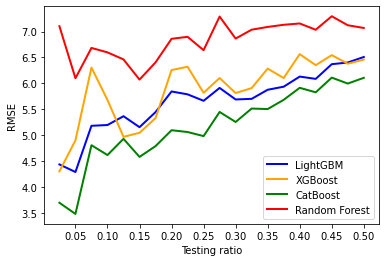

In [16]:
plt.plot(ratio, list17, lw=2, c='blue', label='LightGBM')
plt.plot(ratio, list19, lw=2, c='orange', label='XGBoost')
plt.plot(ratio, list21, lw=2, c='green', label='CatBoost')
plt.plot(ratio, list23, lw=2, c='red', label='Random Forest')

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Testing ratio')
plt.ylabel('RMSE')
plt.legend(loc=4)
plt.show()

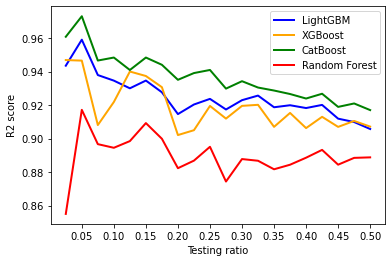

In [17]:
plt.plot(ratio, list18,  lw=2, c='blue', label='LightGBM')
plt.plot(ratio, list20, lw=2, c='orange', label='XGBoost')
plt.plot(ratio, list22, lw=2, c='green', label='CatBoost')
plt.plot(ratio, list24, lw=2, c='red', label='Random Forest')

# plt-style 
plt.xticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])
plt.xlabel('Testing ratio')
plt.ylabel('R2 score')
plt.legend()
plt.show()

In [18]:
# import methods
lgbm = LGBMRegressor()
xgb = XGBRegressor()
cat = CatBoostRegressor()
rdf = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Fitting models on Training data 
lgbm.fit(X_train, y_train) 
xgb.fit(X_train, y_train) 
cat.fit(X_train, y_train) 
rdf.fit(X_train, y_train)

# training and testing with different models and different categorical feature handling methods
y_pred_lgbm=lgbm.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_cat = cat.predict(X_test)
y_pred_rdf = rdf.predict(X_test)
    
print("Model           RMSE      R2") 
print("LightGBM       {:.4f}   {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_lgbm)), r2_score(y_test, y_pred_lgbm))) 
print("XGBoost        {:.4f}   {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_xgb)), r2_score(y_test, y_pred_xgb)))
print("CatBoost       {:.4f}   {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_cat)), r2_score(y_test, y_pred_cat)))
print("Random Forest  {:.4f}   {:.4f}".format(np.sqrt(mean_squared_error(y_test, y_pred_rdf)), r2_score(y_test, y_pred_rdf)))

Learning rate set to 0.040088
0:	learn: 20.4037293	total: 1.58ms	remaining: 1.58s
1:	learn: 19.8937272	total: 2.97ms	remaining: 1.48s
2:	learn: 19.4827388	total: 4.4ms	remaining: 1.46s
3:	learn: 19.0043457	total: 6.07ms	remaining: 1.51s
4:	learn: 18.5381050	total: 7.62ms	remaining: 1.52s
5:	learn: 18.1036882	total: 8.94ms	remaining: 1.48s
6:	learn: 17.7343651	total: 10.3ms	remaining: 1.47s
7:	learn: 17.3457939	total: 11.7ms	remaining: 1.45s
8:	learn: 16.9587045	total: 13.4ms	remaining: 1.48s
9:	learn: 16.5887673	total: 14.9ms	remaining: 1.48s
10:	learn: 16.2189942	total: 16.2ms	remaining: 1.46s
11:	learn: 15.8865551	total: 17.6ms	remaining: 1.45s
12:	learn: 15.5755024	total: 18.9ms	remaining: 1.43s
13:	learn: 15.2629730	total: 20.2ms	remaining: 1.42s
14:	learn: 14.9388760	total: 21.7ms	remaining: 1.42s
15:	learn: 14.6460718	total: 23.1ms	remaining: 1.42s
16:	learn: 14.3636436	total: 24.7ms	remaining: 1.43s
17:	learn: 14.0861586	total: 26.3ms	remaining: 1.43s
18:	learn: 13.8556431	total

298:	learn: 4.1186533	total: 334ms	remaining: 784ms
299:	learn: 4.1130925	total: 336ms	remaining: 783ms
300:	learn: 4.1058212	total: 337ms	remaining: 782ms
301:	learn: 4.1004098	total: 338ms	remaining: 780ms
302:	learn: 4.0957109	total: 339ms	remaining: 779ms
303:	learn: 4.0906123	total: 340ms	remaining: 778ms
304:	learn: 4.0857681	total: 341ms	remaining: 776ms
305:	learn: 4.0779757	total: 342ms	remaining: 775ms
306:	learn: 4.0732092	total: 343ms	remaining: 773ms
307:	learn: 4.0667356	total: 344ms	remaining: 772ms
308:	learn: 4.0639796	total: 345ms	remaining: 771ms
309:	learn: 4.0580696	total: 346ms	remaining: 769ms
310:	learn: 4.0495322	total: 347ms	remaining: 768ms
311:	learn: 4.0434725	total: 348ms	remaining: 766ms
312:	learn: 4.0390789	total: 349ms	remaining: 765ms
313:	learn: 4.0310137	total: 350ms	remaining: 764ms
314:	learn: 4.0268485	total: 351ms	remaining: 762ms
315:	learn: 4.0214156	total: 352ms	remaining: 761ms
316:	learn: 4.0191146	total: 353ms	remaining: 760ms
317:	learn: 

469:	learn: 3.3942698	total: 503ms	remaining: 567ms
470:	learn: 3.3906514	total: 504ms	remaining: 566ms
471:	learn: 3.3871260	total: 505ms	remaining: 565ms
472:	learn: 3.3840652	total: 506ms	remaining: 564ms
473:	learn: 3.3814709	total: 507ms	remaining: 563ms
474:	learn: 3.3777946	total: 508ms	remaining: 562ms
475:	learn: 3.3705518	total: 509ms	remaining: 561ms
476:	learn: 3.3667148	total: 510ms	remaining: 559ms
477:	learn: 3.3642186	total: 511ms	remaining: 558ms
478:	learn: 3.3612299	total: 512ms	remaining: 557ms
479:	learn: 3.3594519	total: 513ms	remaining: 556ms
480:	learn: 3.3576350	total: 514ms	remaining: 555ms
481:	learn: 3.3520514	total: 515ms	remaining: 554ms
482:	learn: 3.3496509	total: 516ms	remaining: 553ms
483:	learn: 3.3464898	total: 517ms	remaining: 552ms
484:	learn: 3.3442079	total: 518ms	remaining: 550ms
485:	learn: 3.3393260	total: 519ms	remaining: 549ms
486:	learn: 3.3336417	total: 520ms	remaining: 548ms
487:	learn: 3.3282964	total: 521ms	remaining: 547ms
488:	learn: 

758:	learn: 2.7056155	total: 832ms	remaining: 264ms
759:	learn: 2.7040736	total: 834ms	remaining: 263ms
760:	learn: 2.7025960	total: 835ms	remaining: 262ms
761:	learn: 2.7011089	total: 836ms	remaining: 261ms
762:	learn: 2.7002604	total: 837ms	remaining: 260ms
763:	learn: 2.6984104	total: 838ms	remaining: 259ms
764:	learn: 2.6970624	total: 839ms	remaining: 258ms
765:	learn: 2.6965475	total: 840ms	remaining: 257ms
766:	learn: 2.6948937	total: 841ms	remaining: 255ms
767:	learn: 2.6926189	total: 842ms	remaining: 254ms
768:	learn: 2.6914939	total: 843ms	remaining: 253ms
769:	learn: 2.6899438	total: 844ms	remaining: 252ms
770:	learn: 2.6893000	total: 845ms	remaining: 251ms
771:	learn: 2.6889964	total: 846ms	remaining: 250ms
772:	learn: 2.6874747	total: 847ms	remaining: 249ms
773:	learn: 2.6858218	total: 848ms	remaining: 248ms
774:	learn: 2.6843627	total: 849ms	remaining: 247ms
775:	learn: 2.6827125	total: 850ms	remaining: 245ms
776:	learn: 2.6822362	total: 851ms	remaining: 244ms
777:	learn: 

923:	learn: 2.4770977	total: 1s	remaining: 82.3ms
924:	learn: 2.4764372	total: 1s	remaining: 81.2ms
925:	learn: 2.4759913	total: 1s	remaining: 80.1ms
926:	learn: 2.4750352	total: 1s	remaining: 79ms
927:	learn: 2.4739041	total: 1s	remaining: 77.9ms
928:	learn: 2.4723957	total: 1s	remaining: 76.8ms
929:	learn: 2.4712204	total: 1.01s	remaining: 75.8ms
930:	learn: 2.4697475	total: 1.01s	remaining: 74.7ms
931:	learn: 2.4696527	total: 1.01s	remaining: 73.6ms
932:	learn: 2.4681451	total: 1.01s	remaining: 72.5ms
933:	learn: 2.4670340	total: 1.01s	remaining: 71.4ms
934:	learn: 2.4665178	total: 1.01s	remaining: 70.3ms
935:	learn: 2.4653558	total: 1.01s	remaining: 69.3ms
936:	learn: 2.4632818	total: 1.01s	remaining: 68.2ms
937:	learn: 2.4624560	total: 1.01s	remaining: 67.1ms
938:	learn: 2.4618249	total: 1.01s	remaining: 66ms
939:	learn: 2.4602897	total: 1.02s	remaining: 64.9ms
940:	learn: 2.4602034	total: 1.02s	remaining: 63.8ms
941:	learn: 2.4590169	total: 1.02s	remaining: 62.7ms
942:	learn: 2.4

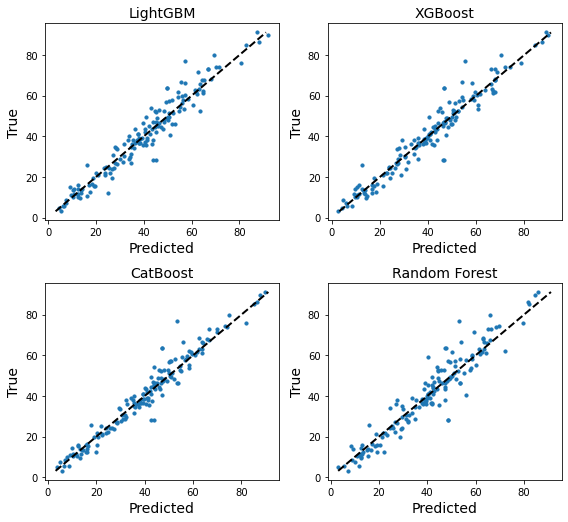

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))

ax1.scatter(y_pred_lgbm, y_test, s=10) 
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax1.set_ylabel("True", fontsize = 14) 
ax1.set_xlabel("Predicted", fontsize = 14) 
ax1.set_title("LightGBM", fontsize = 14) 

ax2.scatter(y_pred_xgb, y_test, s=10) 
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True", fontsize = 14) 
ax2.set_xlabel("Predicted", fontsize = 14) 
ax2.set_title("XGBoost", fontsize = 14) 

ax3.scatter(y_pred_cat, y_test, s=10) 
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax3.set_ylabel("True", fontsize = 14) 
ax3.set_xlabel("Predicted", fontsize = 14) 
ax3.set_title("CatBoost", fontsize = 14) 

ax4.scatter(y_pred_rdf, y_test, s=10) 
ax4.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) 
ax4.set_ylabel("True", fontsize = 14) 
ax4.set_xlabel("Predicted", fontsize = 14) 
ax4.set_title("Random Forest", fontsize = 14) 
 
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

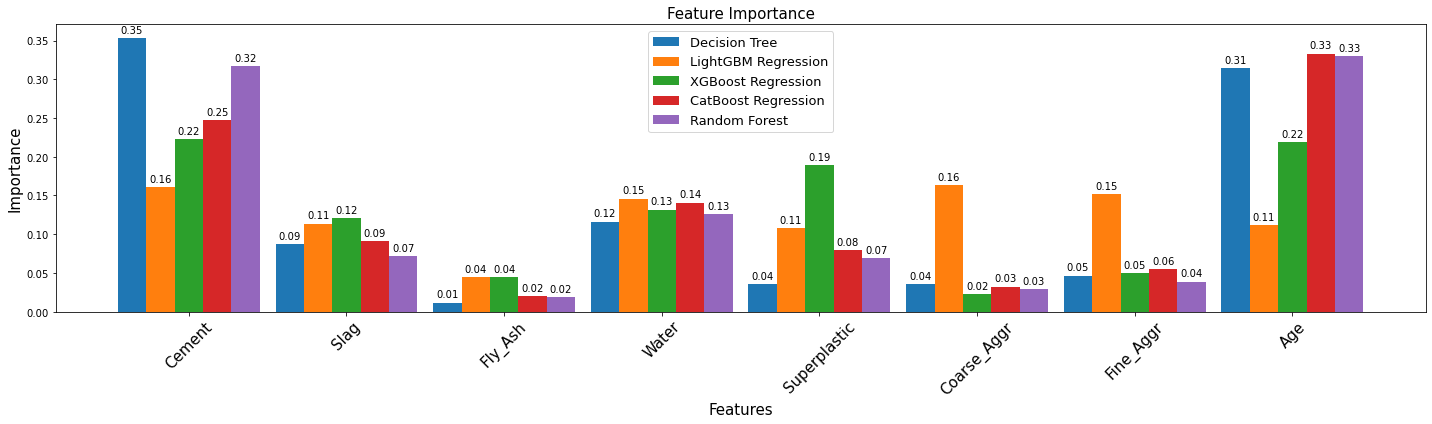

In [20]:
feature_dtr = dtr.feature_importances_ 
feature_lgbm = lgbm.feature_importances_
feature_xgb = xgb.feature_importances_ 
feature_cat = cat.feature_importances_
feature_rdf = rdf.feature_importances_ 

feature_lgbm = feature_lgbm/sum(feature_lgbm)
feature_cat = feature_cat/sum(feature_cat)

labels = df.columns[:-1] 
x = np.arange(len(labels)) 
width = 0.18
fig, ax = plt.subplots(figsize=(20,6)) 
rects1 = ax.bar(x-2*(width), feature_dtr, width, label='Decision Tree') 
rects2 = ax.bar(x-1*(width), feature_lgbm,width, label='LightGBM Regression') 
rects3 = ax.bar(x          , feature_xgb, width, label='XGBoost Regression') 
rects4 = ax.bar(x+1*(width), feature_cat, width, label='CatBoost Regression') 
rects5 = ax.bar(x+2*(width), feature_rdf, width, label='Random Forest') 

ax.set_ylabel('Importance', fontsize = 15) 
ax.set_xlabel('Features', fontsize = 15) 
ax.set_title('Feature Importance', fontsize = 15) 
ax.set_xticks(x) 
ax.set_xticklabels(labels, rotation=45, fontsize = 15) 
ax.legend(loc=9, fontsize = 13) 
autolabel(rects1) 
autolabel(rects2) 
autolabel(rects3) 
autolabel(rects4) 
autolabel(rects5) 
fig.tight_layout() 
plt.show()